# $$ \text{ Evaluation K-means Robuste- Nantes City }$$ 

In [2]:
import sys 
sys.path.append('/home/hanane/DAC1/PLDAC/Code') # put path to the folder here


import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  
import math
import random
from decimal import *
from tools.data_process import *
from tools.eval import *
from tools.Kmeans_hyperbolic import *
from tools.DCCA import *
from tools.display import *


# $ \text{ 1. Loading Data} $

In [3]:
loc_lille=pd.read_csv("../data/BS_Locations/Nantes_antenna_location2.csv")
loc=pd.read_csv("../data/BS_Locations/Nantes_antenna_location2.csv")
del(loc['LocInfo'])
traffic_lille=pd.read_csv("../data/traffic/Nantes/Nantes_traite.csv")

### $ \text{ 1.2 Getting BS ids} $

In [4]:
a=set(loc_lille['LocInfo'])
b=set(traffic_lille['CellID'])
the_ids=list(set(a) & set(b))

In [5]:
a=[]
for k in range(len(loc_lille)):
    a.append((loc_lille[' Coord_X'][k],loc_lille[' Coord_y'][k]))
print('nombre de rrhs : ',len(set(loc_lille['LocInfo'])),', nombre de positions : ',len(set(a)))

nombre de rrhs :  1413 , nombre de positions :  97


In [6]:
test_find_day()

Wednesday


In [7]:
time_slot_hour=[['00:00', '00:10', '00:20', '00:30', '00:40', '00:50'],
 ['01:00', '01:10', '01:20', '01:30', '01:40', '01:50'],
 ['02:00', '02:10', '02:20', '02:30', '02:40', '02:50'],
 ['03:00', '03:10', '03:20', '03:30', '03:40', '03:50'],
 ['04:00', '04:10', '04:20', '04:30', '04:40', '04:50'],
 ['05:00', '05:10', '05:20', '05:30', '05:40', '05:50'],
 ['06:00', '06:10', '06:20', '06:30', '06:40', '06:50'],
 ['07:00', '07:10', '07:20', '07:30', '07:40', '07:50'],
 ['08:00', '08:10', '08:20', '08:30', '08:40', '08:50'],
 ['09:00', '09:10', '09:20', '09:30', '09:40', '09:50'],
 ['10:00', '10:10', '10:20', '10:30', '10:40', '10:50'],
 ['11:00', '11:10', '11:20', '11:30', '11:40', '11:50'],
 ['12:00', '12:10', '12:20', '12:30', '12:40', '12:50'],
 ['13:00', '13:10', '13:20', '13:30', '13:40', '13:50'],
 ['14:00', '14:10', '14:20', '14:30', '14:40', '14:50'],
 ['15:00', '15:10', '15:20', '15:30', '15:40', '15:50'],
 ['16:00', '16:10', '16:20', '16:30', '16:40', '16:50'],
 ['17:00', '17:10', '17:20', '17:30', '17:40', '17:50'],
 ['18:00', '18:10', '18:20', '18:30', '18:40', '18:50'],
 ['19:00', '19:10', '19:20', '19:30', '19:40', '19:50'],
 ['20:00', '20:10', '20:20', '20:30', '20:40', '20:50'],
 ['21:00', '21:10', '21:20', '21:30', '21:40', '21:50'],
 ['22:00', '22:10', '22:20', '22:30', '22:40', '22:50'],
 ['23:00', '23:10', '23:20', '23:30', '23:40', '23:50']]

## $ \text{ 1.1 Construction des DataFrames} $

In [8]:
d,mean_week=construct_data_set(traffic_lille,the_ids)

In [9]:
dataFrames_hour,dict_loc_rrhs=get_dataframes(['08:00', '08:10', '08:20', '08:30', '08:40', '08:50'],'Saturday',d,mean_week,loc_lille,the_ids)

In [10]:
dataFrames_hour[0].iloc[46]

Coord_X     304166.0
Coord_Y    2254734.0
Coord_Z          0.0
Name: 46, dtype: float64

In [11]:
# on somme le traffic par position 
pos_mean_week=get_trafic_per_position(dict_loc_rrhs,time_slot_hour,mean_week)
len(pos_mean_week)


89

## $ \text{ 1.2 Construction des DataFrames for 24h slots} $

> We build traffic dataframe for each hour by averaging the traffic per hour.

In [16]:
dfs_24H=get_24_dfs('Monday',pos_mean_week,time_slot_hour)
df_24=get_24_dfs('Monday',pos_mean_week,time_slot_hour)
df_24_aranged=[]
for df in df_24:
    df_24_aranged.append(df.drop(df.index[77]))
df_24_aranged

[    Coord_X  Coord_Y       Coord_Z
 0    305457  2253609  7.847790e+08
 1    303732  2256210  1.073426e+09
 2    306300  2253151  5.189312e+08
 3    302778  2252421  2.220322e+08
 4    304370  2253785  3.036721e+08
 ..      ...      ...           ...
 84   308570  2257000  2.151111e+02
 85   304995  2253253  4.276726e+03
 86   305046  2256487  6.087978e+05
 87   304809  2252303  0.000000e+00
 88   305133  2253733  0.000000e+00
 
 [88 rows x 3 columns],
     Coord_X  Coord_Y       Coord_Z
 0    305457  2253609  4.119177e+08
 1    303732  2256210  7.678455e+08
 2    306300  2253151  3.771417e+08
 3    302778  2252421  2.284434e+08
 4    304370  2253785  3.114455e+08
 ..      ...      ...           ...
 84   308570  2257000  2.581591e+05
 85   304995  2253253  6.232701e+03
 86   305046  2256487  2.155921e+05
 87   304809  2252303  4.312968e+01
 88   305133  2253733  7.645100e+06
 
 [88 rows x 3 columns],
     Coord_X  Coord_Y       Coord_Z
 0    305457  2253609  2.784632e+08
 1    303732

## $ \text{ 1.2 Normalisation} $

In [17]:
dataFrames_nor=[]
dataFrames=dfs_24H
for dataF in dfs_24H:#df_24_aranged:#
    dataFrames_nor.append(normalisation(dataF))

## $ \text{ 1.3 DATAFRAME avec ressources disponibles }$

In [18]:
dataFrames_nor_inv=get_df_rd(dataFrames_nor)

# $ \text{2. K-means-hyperbolique}$

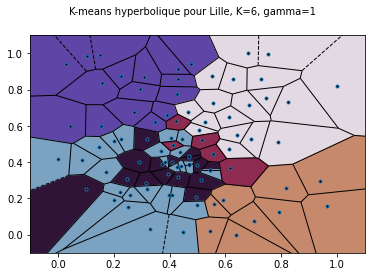

In [19]:
gamma=1
les_centres, l_affectation = kmoyennes(6, dataFrames_nor_inv[23], 0.0005, 100,gamma)
affichage_vor(dataFrames_nor_inv[1],l_affectation,0,6,"K-means hyperbolique pour Lille, K=6, gamma=1")

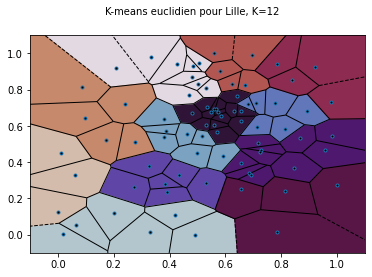

In [250]:
les_centres, l_affectation = kmoyennes_geo(12, dataFrames_nor_inv[23], 0.0005, 100)
affichage_vor(dataFrames_nor_inv[1],l_affectation,0,12,"K-means euclidien pour Lille, K=12")

# $ \text{3. K-means-hyperbolique_Robuste}$

## $ \text{3.1 Méthode 1 : Centroides optimaux}$

>  Trouver des centroids pour chaque slot, et laisser une marge (circle). Moyenner tous les autres centroids des slots suivants qui tombent dans le circle. Le radius du circle determine la robustesse.

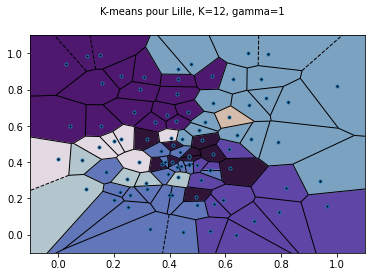

In [20]:
gamma=1
les_centres2, l_affectation2,radius,rn = kmoyennes_robuste_2(12,dataFrames_nor_inv,0.0005,100,gamma,1)
affichage_vor(dataFrames_nor_inv[0],l_affectation2,0,12,"K-means pour Lille, K=12, gamma="+str(gamma))

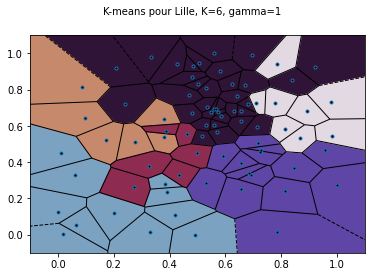

In [254]:
gamma=1
les_centres2, l_affectation2= kmoyennes_robuste_3(6,dataFrames_nor_inv,0.0005,100,gamma)
affichage_vor(dataFrames_nor_inv[0],l_affectation2,0,6,"K-means pour Lille, K=6, gamma="+str(gamma))

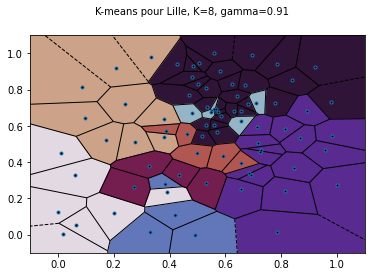

In [36]:
gamma=0.91
les_centres2, l_affectation2= kmoyennes_robuste_3(8,dataFrames_nor_inv,0.0005,100,gamma)
affichage_vor(dataFrames_nor_inv[0],l_affectation2,0,8,"K-means pour Lille, K=8, gamma="+str(gamma))

In [651]:
l_affectation2

{6: [0, 9, 10, 17, 41, 50, 52, 60, 72, 74, 75, 76, 77, 78],
 1: [1, 21, 24, 42, 44, 58, 69],
 2: [2, 7, 8, 13, 38, 46, 47, 54, 55, 61],
 3: [3, 12, 20, 25, 28, 32, 59, 65],
 0: [4, 11, 16, 29, 33, 39],
 4: [5, 6, 43, 63],
 7: [14, 23, 30, 31, 34, 37, 70],
 8: [15, 35, 36, 40, 49, 53, 64],
 5: [18, 27, 57, 67, 71],
 9: [19, 45, 48, 62, 73],
 11: [22, 51],
 10: [26, 56, 66, 68]}

### $ \text{3.2.1  TESTS}$

#### $ \text{3.2.1.1 Gamma/k and radius}$

#### $ \text{3.2.1.2 Tests sur Gamma }$

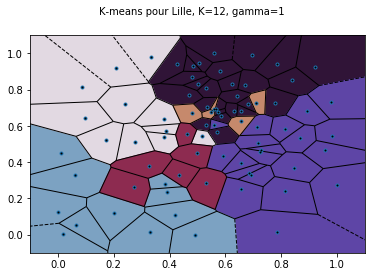

Utilisation :  1.1898978319170082  Cost :  0.8698467275780449 Largeur max :  3201.0


In [654]:
gamma=1
les_centres2, l_affectation2 = kmoyennes_robuste_3(6,dataFrames_nor_inv,0.0005,100,gamma)
affichage_vor(dataFrames_nor_inv[0],l_affectation2,0,6,"K-means pour Lille, K=12, gamma="+str(gamma))
get_nb_cluster(l_affectation2)
util,cost=get_util_cost(dataFrames_nor, l_affectation2)
print('Utilisation : ',util,' Cost : ', cost ,'Largeur max : ',get_max_largeur(l_affectation2,dataFrames[0]))

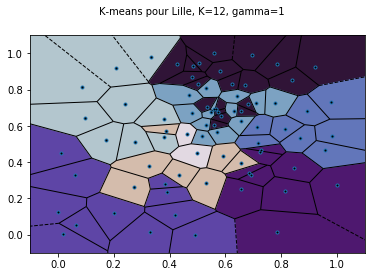

Utilisation :  1.1892914463404352  Cost :  0.8733855247922371 Largeur max :  2115.0


In [653]:
gamma=1
les_centres2, l_affectation2 = kmoyennes_robuste_3(12,dataFrames_nor_inv,0.0005,100,gamma)
affichage_vor(dataFrames_nor_inv[0],l_affectation2,0,12,"K-means pour Lille, K=12, gamma="+str(gamma))
get_nb_cluster(l_affectation2)
util,cost=get_util_cost(dataFrames_nor, l_affectation2)
print('Utilisation : ',util,' Cost : ', cost ,'Largeur max : ',get_max_largeur(l_affectation2,dataFrames[0]))

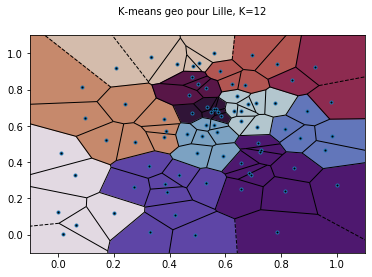

Utilisation :  1.142066448381728  Cost :  0.9037474493196715 Largeur max :  (2188.0, [223.0, 2188.0, 1700.0, 948.0, 768.0, 759.0, 1989.0, 368.0, 1375.0, 730.0, 859.0, 430.0])


(0.04136740511430843, 0.01896006067739135)

In [527]:
les_centres, l_affectation = kmoyennes_geo(12, dataFrames_nor_inv[23], 0.0005, 100)
affichage_vor(dataFrames_nor_inv[1],l_affectation,0,12,"K-means geo pour Lille, K=12")
util,cost=get_util_cost(dataFrames_nor, l_affectation)
print('Utilisation : ',util,' Cost : ', cost ,'Largeur max : ',get_max_largeur(l_affectation,dataFrames[0]))
get_variance_diametre(l_affectation,dataFrames_nor_inv[23])

In [21]:

les_util=[]
les_cost=[]
les_gamma=[]
mean_w=[]
max_w=[]
mean_nbc=[]
mean_les_variance=[]
min_les_variance=[]

les_util_g=[]
les_cost_g=[]
les_gamma_g=[]
mean_w_g=[]
max_w_g=[]
mean_les_variance_g=[]
min_les_variance_g=[]

mean_var_diametre=[]
max_var_diametre=[]
gamma=0
while(gamma<1):
    gamma+=0.02
    les_gamma.append(gamma)
    tmp_u=[]
    tmp_c=[]
    tmp_w=[]
    tmp_nbc=[]
    min_var=[]
    
    tmp_wg=[]
    tmp_ug=[]
    tmp_cg=[]
    min_varg=[]
    tmp_var_w=[]
    
    for i in range(15):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(12,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        nb_cluster=get_nb_cluster(l_affectation2)
        tmp_w.append(w)
        tmp_u.append(util)
        tmp_c.append(cost)
        tmp_nbc.append(nb_cluster)
        min_var.append(get_variance(les_centres2, 12))
        
        les_centres_g, l_affectation_g = kmoyennes_geo(12, dataFrames_nor_inv[0], 0.0005, 100)
        util,cost=get_util_cost(dataFrames_nor, l_affectation_g)
        w=get_max_largeur(l_affectation_g,dataFrames[0])
        tmp_wg.append(w)
        tmp_ug.append(util)
        tmp_cg.append(cost)
        min_varg.append(get_variance(les_centres_g, 12))
        tmp_var_w.append(get_variance_diametre(l_affectation2,dataFrames_nor_inv[0]))
        
    mean_var_diametre.append(np.mean(tmp_var_w))
    max_var_diametre.append(max(tmp_var_w))
    min_les_variance_g.append(min(min_varg))
    mean_les_variance_g.append(np.mean(min_varg))
    mean_w_g.append(np.mean(tmp_wg))
    max_w_g.append(max(tmp_wg))
    les_util_g.append(np.mean(tmp_ug))
    les_cost_g.append(np.mean(tmp_cg))
        
    min_les_variance.append(min(min_var))
    mean_les_variance.append(np.mean(min_var))
    mean_w.append(np.mean(tmp_w))
    max_w.append(max(tmp_w))
    mean_nbc.append(np.mean(tmp_nbc))
    les_util.append(np.mean(tmp_u))
    les_cost.append(np.mean(tmp_c))
    
for gamma in range(1,50):
    les_gamma.append(gamma)
    tmp_u=[]
    tmp_c=[]
    tmp_w=[]
    tmp_nbc=[]
    min_var=[]
    
    tmp_wg=[]
    tmp_ug=[]
    tmp_cg=[]
    min_varg=[]
    tmp_var_w=[]
    
    for i in range(15):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(12,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        nb_cluster=get_nb_cluster(l_affectation2)
        tmp_w.append(w)
        tmp_u.append(util)
        tmp_c.append(cost)
        tmp_nbc.append(nb_cluster)
        min_var.append(get_variance(les_centres2, 12))
        
        les_centres_g, l_affectation_g = kmoyennes_geo(12, dataFrames_nor_inv[0], 0.0005, 100)
        util,cost=get_util_cost(dataFrames_nor, l_affectation_g)
        w=get_max_largeur(l_affectation_g,dataFrames[0])
        tmp_wg.append(w)
        tmp_ug.append(util)
        tmp_cg.append(cost)
        min_varg.append(get_variance(les_centres_g, 12))
        tmp_var_w.append(get_variance_diametre(l_affectation2,dataFrames_nor_inv[0]))
        
    mean_var_diametre.append(np.mean(tmp_var_w))
    max_var_diametre.append(max(tmp_var_w))
    min_les_variance_g.append(min(min_varg))
    mean_les_variance_g.append(np.mean(min_varg))
    mean_w_g.append(np.mean(tmp_wg))
    max_w_g.append(max(tmp_wg))
    les_util_g.append(np.mean(tmp_ug))
    les_cost_g.append(np.mean(tmp_cg))
        
    min_les_variance.append(min(min_var))
    mean_les_variance.append(np.mean(min_var))
    mean_w.append(np.mean(tmp_w))
    max_w.append(max(tmp_w))
    mean_nbc.append(np.mean(tmp_nbc))
    les_util.append(np.mean(tmp_u))
    les_cost.append(np.mean(tmp_c))
 

'\nles_util=[]\nles_cost=[]\nles_gamma=[]\nmean_w=[]\nmax_w=[]\nmean_nbc=[]\nmean_les_variance=[]\nmin_les_variance=[]\n\nles_util_g=[]\nles_cost_g=[]\nles_gamma_g=[]\nmean_w_g=[]\nmax_w_g=[]\nmean_les_variance_g=[]\nmin_les_variance_g=[]\n\nmean_var_diametre=[]\nmax_var_diametre=[]\ngamma=0\nwhile(gamma<1):\n    gamma+=0.02\n    les_gamma.append(gamma)\n    tmp_u=[]\n    tmp_c=[]\n    tmp_w=[]\n    tmp_nbc=[]\n    min_var=[]\n    \n    tmp_wg=[]\n    tmp_ug=[]\n    tmp_cg=[]\n    min_varg=[]\n    tmp_var_w=[]\n    \n    for i in range(15):\n        les_centres2, l_affectation2 = kmoyennes_robuste_3(12,dataFrames_nor_inv,0.0005,100,gamma)\n        util,cost=get_util_cost(dataFrames_nor, l_affectation2)\n        w=get_max_largeur(l_affectation2,dataFrames[0])\n        nb_cluster=get_nb_cluster(l_affectation2)\n        tmp_w.append(w)\n        tmp_u.append(util)\n        tmp_c.append(cost)\n        tmp_nbc.append(nb_cluster)\n        min_var.append(get_variance(les_centres2, 12))\n      

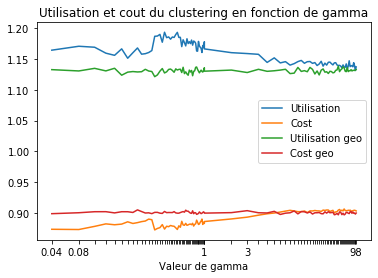

In [575]:
log_gamma=[np.log(i) for i in les_gamma]
aff=["" for i in les_gamma]
aff[0]=0.04
aff[1]=0.08
aff[les_gamma.index(1)]=1
aff[les_gamma.index(3)]=3
aff[len(aff)-1]=len(aff)-1
plt.plot(log_gamma,les_util,label="Utilisation")
plt.plot(log_gamma,les_cost,label="Cost")
plt.plot(log_gamma,les_util_g,label="Utilisation geo")
plt.plot(log_gamma,les_cost_g,label="Cost geo")
plt.xticks(log_gamma, aff)
plt.legend()
plt.ylabel("")
plt.xlabel("Valeur de gamma")
plt.title("Utilisation et cout du clustering en fonction de gamma")
plt.show()

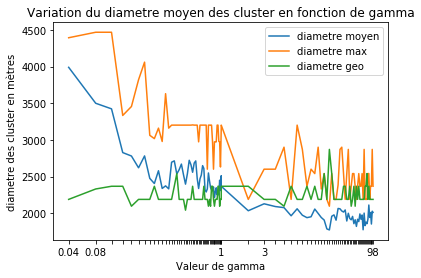

In [591]:
log_gamma=[np.log(i) for i in les_gamma]
aff=["" for i in les_gamma]
aff[0]=0.04
aff[1]=0.08
aff[les_gamma.index(1)]=1
aff[les_gamma.index(3)]=3
aff[len(aff)-1]=len(aff)-1
plt.plot(log_gamma,mean_w,label="diametre moyen")
plt.plot(log_gamma,max_w,label="diametre max")
plt.plot(log_gamma,max_w_g,label="diametre geo")
plt.xticks(log_gamma, aff)
plt.legend()
plt.ylabel("diametre des cluster en mètres")
plt.xlabel("Valeur de gamma")
plt.title("Variation du diametre moyen des cluster en fonction de gamma")
plt.show()

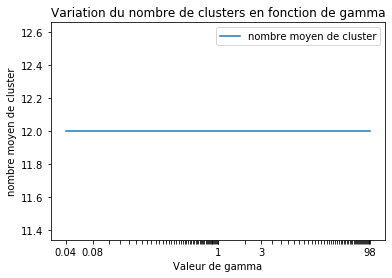

In [577]:
log_gamma=[np.log(i) for i in les_gamma]
aff=["" for i in les_gamma]
aff[0]=0.04
aff[1]=0.08
aff[les_gamma.index(1)]=1
aff[les_gamma.index(3)]=3
aff[len(aff)-1]=len(aff)-1
plt.plot(log_gamma, mean_nbc,label="nombre moyen de cluster")
plt.xticks(log_gamma, aff)
plt.legend()
plt.ylabel("nombre moyen de cluster")
plt.xlabel("Valeur de gamma")
plt.title("Variation du nombre de clusters en fonction de gamma")
plt.show()

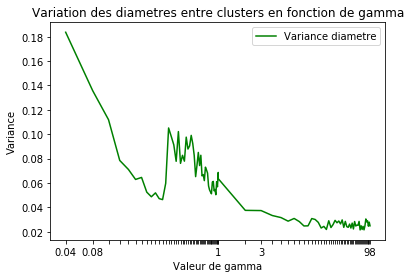

In [592]:
log_gamma=[np.log(i) for i in les_gamma]
aff=["" for i in les_gamma]
aff[0]=0.04
aff[1]=0.08
aff[les_gamma.index(1)]=1
aff[les_gamma.index(3)]=3
aff[len(aff)-1]=len(aff)-1
plt.plot(log_gamma, mean_var_diametre,label="Variance diametre",color='green')
plt.xticks(log_gamma, aff)
plt.legend()
plt.ylabel("Variance")
plt.xlabel("Valeur de gamma")
plt.title("Variation des diametres entre clusters en fonction de gamma")
plt.show()

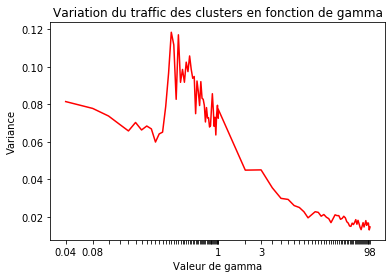

In [590]:
log_gamma=[np.log(i) for i in les_gamma]
aff=["" for i in les_gamma]
aff[0]=0.04
aff[1]=0.08
aff[les_gamma.index(1)]=1
aff[les_gamma.index(3)]=3
aff[len(aff)-1]=len(aff)-1
plt.plot(log_gamma, mean_les_variance,color='red')
#plt.plot(log_gamma, mean_les_variance_g,label="Euclidien")
plt.xticks(log_gamma, aff)

plt.ylabel("Variance")
plt.xlabel("Valeur de gamma")
plt.title("Variation du traffic des clusters en fonction de gamma")
plt.show()

### $ \text{TESTS: gamma= 0.01}$

In [596]:
les_util2=[]
les_cost2=[]
les_k=[]
mean_w2=[]
max_w2=[]
mean_nbc2=[]
mean_les_variance2=[]
min_les_variance2=[]

les_util_g2=[]
les_cost_g2=[]
les_gamma_g2=[]
mean_w_g2=[]
max_w_g2=[]
mean_les_variance_g2=[]
min_les_variance_g2=[]

mean_var_diametre2=[]
max_var_diametre2=[]
gamma=0.01
for k in range(2,30):
    les_k.append(k)
    les_gamma.append(gamma)
    tmp_u=[]
    tmp_c=[]
    tmp_w=[]
    tmp_nbc=[]
    min_var=[]
    
    tmp_wg=[]
    tmp_ug=[]
    tmp_cg=[]
    min_varg=[]
    tmp_var_w=[]
    
    for i in range(15):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(k,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        nb_cluster=get_nb_cluster(l_affectation2)
        tmp_w.append(w)
        tmp_u.append(util)
        tmp_c.append(cost)
        tmp_nbc.append(nb_cluster)
        min_var.append(get_variance(les_centres2, k))
        
        les_centres_g, l_affectation_g = kmoyennes_geo(k, dataFrames_nor_inv[0], 0.0005, 100)
        util,cost=get_util_cost(dataFrames_nor, l_affectation_g)
        w=get_max_largeur(l_affectation_g,dataFrames[0])
        tmp_wg.append(w)
        tmp_ug.append(util)
        tmp_cg.append(cost)
        min_varg.append(get_variance(les_centres_g, k))
        tmp_var_w.append(get_variance_diametre(l_affectation2,dataFrames_nor_inv[0]))
        
    mean_var_diametre.append(np.mean(tmp_var_w))
    max_var_diametre.append(max(tmp_var_w))
    min_les_variance_g.append(min(min_varg))
    mean_les_variance_g.append(np.mean(min_varg))
    mean_w_g.append(np.mean(tmp_wg))
    max_w_g.append(max(tmp_wg))
    les_util_g.append(np.mean(tmp_ug))
    les_cost_g.append(np.mean(tmp_cg))
        
    min_les_variance.append(min(min_var))
    mean_les_variance.append(np.mean(min_var))
    mean_w.append(np.mean(tmp_w))
    max_w.append(max(tmp_w))
    mean_nbc.append(np.mean(tmp_nbc))
    les_util.append(np.mean(tmp_u))
    les_cost.append(np.mean(tmp_c))

In [605]:
len(les_util[99:])


28

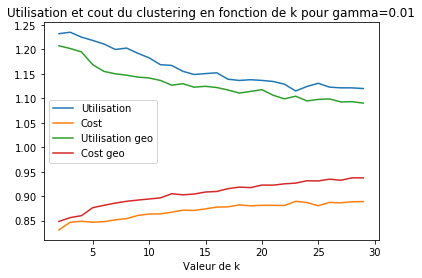

In [607]:
plt.plot(les_k,les_util[99:],label="Utilisation")
plt.plot(les_k,les_cost[99:],label="Cost")
plt.plot(les_k,les_util_g[99:],label="Utilisation geo")
plt.plot(les_k,les_cost_g[99:],label="Cost geo")

plt.legend()
plt.ylabel("")
plt.xlabel("Valeur de k")
plt.title("Utilisation et cout du clustering en fonction de k pour gamma=0.01")
plt.show()

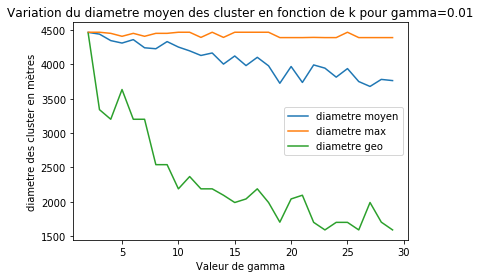

In [610]:
plt.plot(les_k,mean_w[99:],label="diametre moyen")
plt.plot(les_k,max_w[99:],label="diametre max")
plt.plot(les_k,max_w_g[99:],label="diametre geo")
plt.legend()
plt.ylabel("diametre des cluster en mètres")
plt.xlabel("Valeur de gamma")
plt.title("Variation du diametre moyen des cluster en fonction de k pour gamma=0.01")
plt.show()

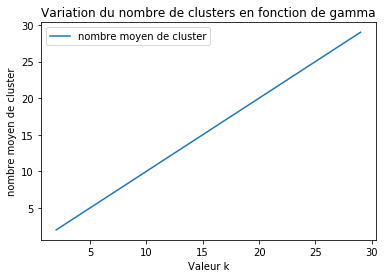

In [612]:
plt.plot(les_k, mean_nbc[99:],label="nombre moyen de cluster")
plt.legend()
plt.ylabel("nombre moyen de cluster")
plt.xlabel("Valeur k")
plt.title("Variation du nombre de clusters en fonction de gamma")
plt.show()

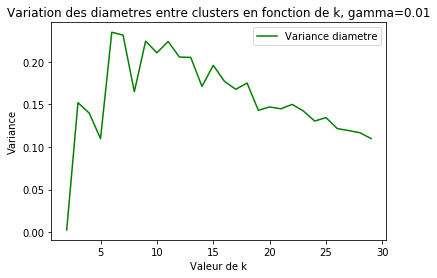

In [614]:
plt.plot(les_k, mean_var_diametre[99:],label="Variance diametre",color='green')
plt.legend()
plt.ylabel("Variance")
plt.xlabel("Valeur de k")
plt.title("Variation des diametres entre clusters en fonction de k, gamma=0.01")
plt.show()

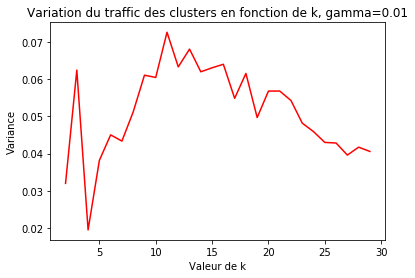

In [617]:
plt.plot(les_k, mean_les_variance[99:],color='red')
plt.ylabel("Variance")
plt.xlabel("Valeur de k")
plt.title("Variation du traffic des clusters en fonction de k, gamma=0.01")
plt.show()

### $ \text{TESTS: gamma= 1}$

In [619]:
les_util2=[]
les_cost2=[]
les_k=[]
mean_w2=[]
max_w2=[]
mean_nbc2=[]
mean_les_variance2=[]
min_les_variance2=[]

les_util_g2=[]
les_cost_g2=[]
les_gamma_g2=[]
mean_w_g2=[]
max_w_g2=[]
mean_les_variance_g2=[]
min_les_variance_g2=[]

mean_var_diametre2=[]
max_var_diametre2=[]
gamma=1
for k in range(2,30):
    les_k.append(k)
    les_gamma.append(gamma)
    tmp_u=[]
    tmp_c=[]
    tmp_w=[]
    tmp_nbc=[]
    min_var=[]
    
    tmp_wg=[]
    tmp_ug=[]
    tmp_cg=[]
    min_varg=[]
    tmp_var_w=[]
    
    for i in range(15):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(k,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        nb_cluster=get_nb_cluster(l_affectation2)
        tmp_w.append(w)
        tmp_u.append(util)
        tmp_c.append(cost)
        tmp_nbc.append(nb_cluster)
        min_var.append(get_variance(les_centres2, k))
        
        les_centres_g, l_affectation_g = kmoyennes_geo(k, dataFrames_nor_inv[0], 0.0005, 100)
        util,cost=get_util_cost(dataFrames_nor, l_affectation_g)
        w=get_max_largeur(l_affectation_g,dataFrames[0])
        tmp_wg.append(w)
        tmp_ug.append(util)
        tmp_cg.append(cost)
        min_varg.append(get_variance(les_centres_g, k))
        tmp_var_w.append(get_variance_diametre(l_affectation2,dataFrames_nor_inv[0]))
        
    mean_var_diametre2.append(np.mean(tmp_var_w))
    max_var_diametre2.append(max(tmp_var_w))
    min_les_variance_g2.append(min(min_varg))
    mean_les_variance_g2.append(np.mean(min_varg))
    mean_w_g2.append(np.mean(tmp_wg))
    max_w_g2.append(max(tmp_wg))
    les_util_g2.append(np.mean(tmp_ug))
    les_cost_g2.append(np.mean(tmp_cg))
        
    min_les_variance2.append(min(min_var))
    mean_les_variance2.append(np.mean(min_var))
    mean_w2.append(np.mean(tmp_w))
    max_w2.append(max(tmp_w))
    mean_nbc2.append(np.mean(tmp_nbc))
    les_util2.append(np.mean(tmp_u))
    les_cost2.append(np.mean(tmp_c))

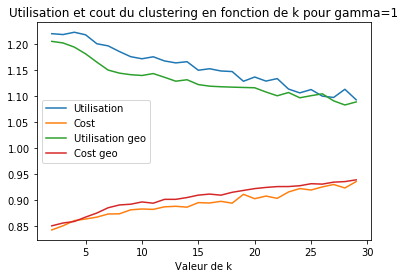

In [621]:
plt.plot(les_k,les_util2,label="Utilisation")
plt.plot(les_k,les_cost2,label="Cost")
plt.plot(les_k,les_util_g2,label="Utilisation geo")
plt.plot(les_k,les_cost_g2,label="Cost geo")

plt.legend()
plt.ylabel("")
plt.xlabel("Valeur de k")
plt.title("Utilisation et cout du clustering en fonction de k pour gamma=1")
plt.show()

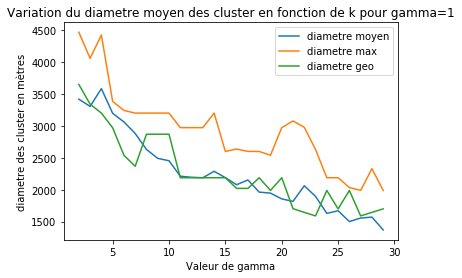

In [622]:
plt.plot(les_k,mean_w2,label="diametre moyen")
plt.plot(les_k,max_w2,label="diametre max")
plt.plot(les_k,max_w_g2,label="diametre geo")
plt.legend()
plt.ylabel("diametre des cluster en mètres")
plt.xlabel("Valeur de gamma")
plt.title("Variation du diametre moyen des cluster en fonction de k pour gamma=1")
plt.show()

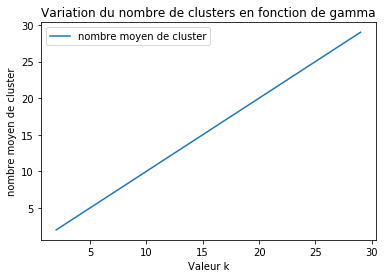

In [623]:
plt.plot(les_k, mean_nbc2,label="nombre moyen de cluster")
plt.legend()
plt.ylabel("nombre moyen de cluster")
plt.xlabel("Valeur k")
plt.title("Variation du nombre de clusters en fonction de gamma")
plt.show()

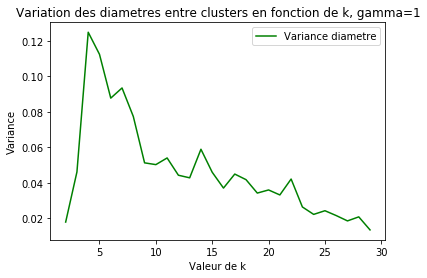

In [624]:
plt.plot(les_k, mean_var_diametre2,label="Variance diametre",color='green')
plt.legend()
plt.ylabel("Variance")
plt.xlabel("Valeur de k")
plt.title("Variation des diametres entre clusters en fonction de k, gamma=1")
plt.show()

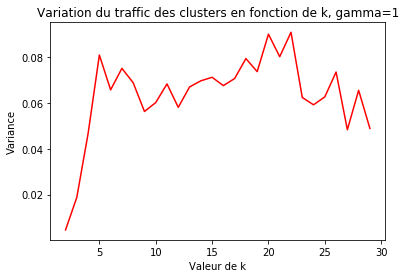

In [625]:
plt.plot(les_k, mean_les_variance2,color='red')
plt.ylabel("Variance")
plt.xlabel("Valeur de k")
plt.title("Variation du traffic des clusters en fonction de k, gamma=1")
plt.show()

### $ \text{TESTS: gamma= 20}$

In [626]:
les_util2=[]
les_cost2=[]
les_k=[]
mean_w2=[]
max_w2=[]
mean_nbc2=[]
mean_les_variance2=[]
min_les_variance2=[]

les_util_g2=[]
les_cost_g2=[]
les_gamma_g2=[]
mean_w_g2=[]
max_w_g2=[]
mean_les_variance_g2=[]
min_les_variance_g2=[]

mean_var_diametre2=[]
max_var_diametre2=[]
gamma=20
for k in range(2,30):
    les_k.append(k)
    les_gamma.append(gamma)
    tmp_u=[]
    tmp_c=[]
    tmp_w=[]
    tmp_nbc=[]
    min_var=[]
    
    tmp_wg=[]
    tmp_ug=[]
    tmp_cg=[]
    min_varg=[]
    tmp_var_w=[]
    
    for i in range(15):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(k,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        nb_cluster=get_nb_cluster(l_affectation2)
        tmp_w.append(w)
        tmp_u.append(util)
        tmp_c.append(cost)
        tmp_nbc.append(nb_cluster)
        min_var.append(get_variance(les_centres2, k))
        
        les_centres_g, l_affectation_g = kmoyennes_geo(k, dataFrames_nor_inv[0], 0.0005, 100)
        util,cost=get_util_cost(dataFrames_nor, l_affectation_g)
        w=get_max_largeur(l_affectation_g,dataFrames[0])
        tmp_wg.append(w)
        tmp_ug.append(util)
        tmp_cg.append(cost)
        min_varg.append(get_variance(les_centres_g, k))
        tmp_var_w.append(get_variance_diametre(l_affectation2,dataFrames_nor_inv[0]))
        
    mean_var_diametre2.append(np.mean(tmp_var_w))
    max_var_diametre2.append(max(tmp_var_w))
    min_les_variance_g2.append(min(min_varg))
    mean_les_variance_g2.append(np.mean(min_varg))
    mean_w_g2.append(np.mean(tmp_wg))
    max_w_g2.append(max(tmp_wg))
    les_util_g2.append(np.mean(tmp_ug))
    les_cost_g2.append(np.mean(tmp_cg))
        
    min_les_variance2.append(min(min_var))
    mean_les_variance2.append(np.mean(min_var))
    mean_w2.append(np.mean(tmp_w))
    max_w2.append(max(tmp_w))
    mean_nbc2.append(np.mean(tmp_nbc))
    les_util2.append(np.mean(tmp_u))
    les_cost2.append(np.mean(tmp_c))

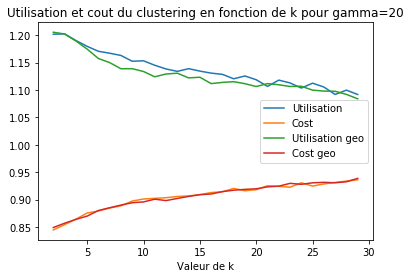

In [630]:
plt.plot(les_k,les_util2,label="Utilisation")
plt.plot(les_k,les_cost2,label="Cost")
plt.plot(les_k,les_util_g2,label="Utilisation geo")
plt.plot(les_k,les_cost_g2,label="Cost geo")

plt.legend()
plt.ylabel("")
plt.xlabel("Valeur de k")
plt.title("Utilisation et cout du clustering en fonction de k pour gamma=20")
plt.show()

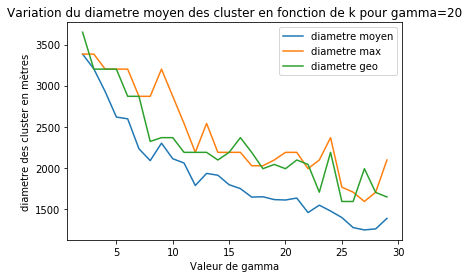

In [631]:
plt.plot(les_k,mean_w2,label="diametre moyen")
plt.plot(les_k,max_w2,label="diametre max")
plt.plot(les_k,max_w_g2,label="diametre geo")
plt.legend()
plt.ylabel("diametre des cluster en mètres")
plt.xlabel("Valeur de gamma")
plt.title("Variation du diametre moyen des cluster en fonction de k pour gamma=20")
plt.show()

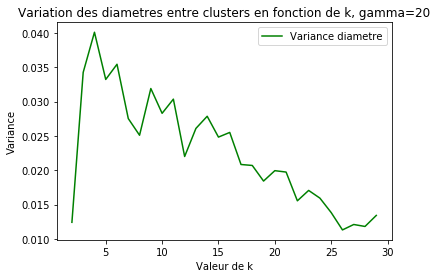

In [632]:
plt.plot(les_k, mean_var_diametre2,label="Variance diametre",color='green')
plt.legend()
plt.ylabel("Variance")
plt.xlabel("Valeur de k")
plt.title("Variation des diametres entre clusters en fonction de k, gamma=20")
plt.show()

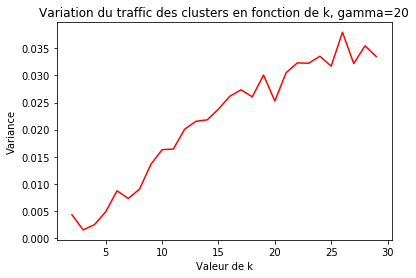

In [633]:
plt.plot(les_k, mean_les_variance2,color='red')
plt.ylabel("Variance")
plt.xlabel("Valeur de k")
plt.title("Variation du traffic des clusters en fonction de k, gamma=20")
plt.show()

### $ \text{TESTS : K=6}$

In [43]:
les_util=[]
les_cost=[]
les_gamma=[]
mean_w=[]
max_w=[]
mean_nbc=[]
mean_les_variance=[]
min_les_variance=[]

les_util_g=[]
les_cost_g=[]
les_gamma_g=[]
mean_w_g=[]
max_w_g=[]
mean_les_variance_g=[]
min_les_variance_g=[]

mean_var_diametre=[]
max_var_diametre=[]
gamma=0
while(gamma<1):
    gamma+=0.05
    les_gamma.append(gamma)
    tmp_u=[]
    tmp_c=[]
    tmp_w=[]
    tmp_nbc=[]
    min_var=[]
    
    tmp_wg=[]
    tmp_ug=[]
    tmp_cg=[]
    min_varg=[]
    tmp_var_w=[]
    
    for i in range(1):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(12,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        nb_cluster=get_nb_cluster(l_affectation2)
        tmp_w.append(w)
        tmp_u.append(util)
        tmp_c.append(cost)
        tmp_nbc.append(nb_cluster)
        min_var.append(get_variance(les_centres2, 12))
        
        les_centres_g, l_affectation_g = kmoyennes_geo(12, dataFrames_nor_inv[0], 0.0005, 100)
        util,cost=get_util_cost(dataFrames_nor, l_affectation_g)
        w=get_max_largeur(l_affectation_g,dataFrames[0])
        tmp_wg.append(w)
        tmp_ug.append(util)
        tmp_cg.append(cost)
        min_varg.append(get_variance(les_centres_g, 12))
        tmp_var_w.append(get_variance_diametre(l_affectation2,dataFrames_nor_inv[0]))
        
    mean_var_diametre.append(np.mean(tmp_var_w))
    max_var_diametre.append(max(tmp_var_w))
    min_les_variance_g.append(min(min_varg))
    mean_les_variance_g.append(np.mean(min_varg))
    mean_w_g.append(np.mean(tmp_wg))
    max_w_g.append(max(tmp_wg))
    les_util_g.append(np.mean(tmp_ug))
    les_cost_g.append(np.mean(tmp_cg))
        
    min_les_variance.append(min(min_var))
    mean_les_variance.append(np.mean(min_var))
    mean_w.append(np.mean(tmp_w))
    max_w.append(max(tmp_w))
    mean_nbc.append(np.mean(tmp_nbc))
    les_util.append(np.mean(tmp_u))
    les_cost.append(np.mean(tmp_c))
    
for gamma in range(1,5):
    les_gamma.append(gamma)
    tmp_u=[]
    tmp_c=[]
    tmp_w=[]
    tmp_nbc=[]
    min_var=[]
    
    tmp_wg=[]
    tmp_ug=[]
    tmp_cg=[]
    min_varg=[]
    tmp_var_w=[]
    
    for i in range(1):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(12,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        nb_cluster=get_nb_cluster(l_affectation2)
        tmp_w.append(w)
        tmp_u.append(util)
        tmp_c.append(cost)
        tmp_nbc.append(nb_cluster)
        min_var.append(get_variance(les_centres2, 12))
        
        les_centres_g, l_affectation_g = kmoyennes_geo(12, dataFrames_nor_inv[0], 0.0005, 100)
        util,cost=get_util_cost(dataFrames_nor, l_affectation_g)
        w=get_max_largeur(l_affectation_g,dataFrames[0])
        tmp_wg.append(w)
        tmp_ug.append(util)
        tmp_cg.append(cost)
        min_varg.append(get_variance(les_centres_g, 12))
        tmp_var_w.append(get_variance_diametre(l_affectation2,dataFrames_nor_inv[0]))
        
    mean_var_diametre.append(np.mean(tmp_var_w))
    max_var_diametre.append(max(tmp_var_w))
    min_les_variance_g.append(min(min_varg))
    mean_les_variance_g.append(np.mean(min_varg))
    mean_w_g.append(np.mean(tmp_wg))
    max_w_g.append(max(tmp_wg))
    les_util_g.append(np.mean(tmp_ug))
    les_cost_g.append(np.mean(tmp_cg))
        
    min_les_variance.append(min(min_var))
    mean_les_variance.append(np.mean(min_var))
    mean_w.append(np.mean(tmp_w))
    max_w.append(max(tmp_w))
    mean_nbc.append(np.mean(tmp_nbc))
    les_util.append(np.mean(tmp_u))
    les_cost.append(np.mean(tmp_c))

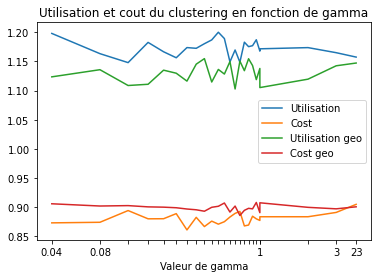

In [44]:
log_gamma=[np.log(i) for i in les_gamma]
aff=["" for i in les_gamma]
aff[0]=0.04
aff[1]=0.08
aff[les_gamma.index(1)]=1
aff[les_gamma.index(3)]=3
aff[len(aff)-1]=len(aff)-1
plt.plot(log_gamma,les_util,label="Utilisation")
plt.plot(log_gamma,les_cost,label="Cost")
plt.plot(log_gamma,les_util_g,label="Utilisation geo")
plt.plot(log_gamma,les_cost_g,label="Cost geo")
plt.xticks(log_gamma, aff)
plt.legend()
plt.ylabel("")
plt.xlabel("Valeur de gamma")
plt.title("Utilisation et cout du clustering en fonction de gamma")
plt.show()

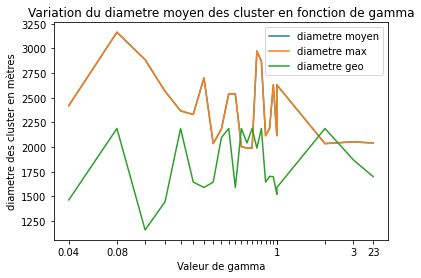

In [45]:
log_gamma=[np.log(i) for i in les_gamma]
aff=["" for i in les_gamma]
aff[0]=0.04
aff[1]=0.08
aff[les_gamma.index(1)]=1
aff[les_gamma.index(3)]=3
aff[len(aff)-1]=len(aff)-1
plt.plot(log_gamma,mean_w,label="diametre moyen")
plt.plot(log_gamma,max_w,label="diametre max")
plt.plot(log_gamma,max_w_g,label="diametre geo")
plt.xticks(log_gamma, aff)
plt.legend()
plt.ylabel("diametre des cluster en mètres")
plt.xlabel("Valeur de gamma")
plt.title("Variation du diametre moyen des cluster en fonction de gamma")
plt.show()

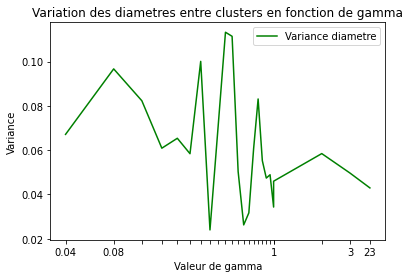

In [46]:
log_gamma=[np.log(i) for i in les_gamma]
aff=["" for i in les_gamma]
aff[0]=0.04
aff[1]=0.08
aff[les_gamma.index(1)]=1
aff[les_gamma.index(3)]=3
aff[len(aff)-1]=len(aff)-1
plt.plot(log_gamma, mean_var_diametre,label="Variance diametre",color='green')
plt.xticks(log_gamma, aff)
plt.legend()
plt.ylabel("Variance")
plt.xlabel("Valeur de gamma")
plt.title("Variation des diametres entre clusters en fonction de gamma")
plt.show()

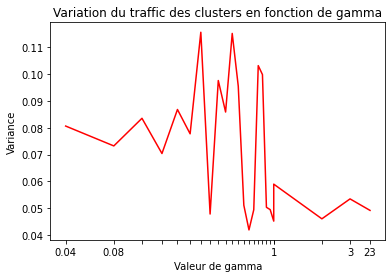

In [47]:
log_gamma=[np.log(i) for i in les_gamma]
aff=["" for i in les_gamma]
aff[0]=0.04
aff[1]=0.08
aff[les_gamma.index(1)]=1
aff[les_gamma.index(3)]=3
aff[len(aff)-1]=len(aff)-1
plt.plot(log_gamma, mean_les_variance,color='red')
#plt.plot(log_gamma, mean_les_variance_g,label="Euclidien")
plt.xticks(log_gamma, aff)

plt.ylabel("Variance")
plt.xlabel("Valeur de gamma")
plt.title("Variation du traffic des clusters en fonction de gamma")
plt.show()

### $ \text{3.3 Comparaison avec DCCA}$

In [31]:
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull
import numpy as np
import matplotlib.pyplot as plt
import DCCA 
import pandas as pd
from datetime import datetime as dt
import math

## Read dataframe

In [32]:
dfs_24H=get_24_dfs('Wednesday',pos_mean_week,time_slot_hour)
dataFrames_nor=[]
dataFrames=dfs_24H
for dataF in dataFrames:
    dataFrames_nor.append(normalisation(dataF))
dataFrames_nor_inv=get_df_rd(dataFrames_nor)

In [33]:
dt=1  #DeltaT = 1heure
Nt=int(24/dt)  #nombre de timespan  par jour
NBBU=2
CBBU=1
To=0.04
max_iter=20
iter_converge=6

In [35]:
#F,Fup,r=generaF_normte_day_matrix("2019-03-19")
F_norm,r=generate_day_matrix2(dfs_24H,dataFrames_nor,dict_loc_rrhs)

In [36]:
dataFrames_nor

[     Coord_X   Coord_Y       Coord_Z
 0   0.467925  0.434963  5.153270e-01
 1   0.309158  0.867598  3.865435e-01
 2   0.545513  0.358782  5.555164e-01
 3   0.221353  0.237359  7.743058e-02
 4   0.367879  0.464238  3.068207e-01
 ..       ...       ...           ...
 84  0.754441  0.999002  3.013164e-03
 85  0.425403  0.375749  2.394868e-06
 86  0.430097  0.913673  3.390058e-03
 87  0.408283  0.217731  5.321451e-10
 88  0.438104  0.455589  5.321451e-10
 
 [89 rows x 3 columns],
      Coord_X   Coord_Y       Coord_Z
 0   0.467925  0.434963  3.804593e-01
 1   0.309158  0.867598  4.988776e-01
 2   0.545513  0.358782  3.506151e-01
 3   0.221353  0.237359  1.284592e-01
 4   0.367879  0.464238  2.483517e-01
 ..       ...       ...           ...
 84  0.754441  0.999002  7.198396e-03
 85  0.425403  0.375749  3.866790e-03
 86  0.430097  0.913673  1.750851e-04
 87  0.408283  0.217731  2.297926e-04
 88  0.438104  0.455589  7.324741e-10
 
 [89 rows x 3 columns],
      Coord_X   Coord_Y       Coord_

In [ ]:
gamma=1
k=9
les_centres2, l_affectation2 = kmoyennes_geo(k,dataFrames_nor_inv,0.0005,100,gamma)
affichage_vor(dataFrames_nor_inv[0],l_affectation2,0,k,"2D K-means pour Nantes, K= "+str(k))
get_nb_cluster(l_affectation2)
util,cost=get_util_cost(dataFrames_nor, l_affectation2)
print('Utilisation : ',util,' Cost : ', cost ,'Largeur max : ',get_max_largeur(l_affectation2,dataFrames[0]))

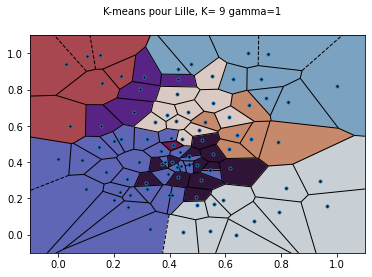

Utilisation :  1.25241392947903  Cost :  0.8379035508250866 Largeur max :  3033.0


In [138]:
gamma=1
k=9
les_centres2, l_affectation2 = kmoyennes_robuste_3(k,dataFrames_nor_inv,0.0005,100,gamma)
affichage_vor(dataFrames_nor_inv[0],l_affectation2,0,k,"K-means pour Lille, K= "+str(k)+ " gamma="+str(gamma))
get_nb_cluster(l_affectation2)
util,cost=get_util_cost(dataFrames_nor, l_affectation2)
print('Utilisation : ',util,' Cost : ', cost ,'Largeur max : ',get_max_largeur(l_affectation2,dataFrames[0]))

9
(1.1984075607878697, 0.8393862613600043)


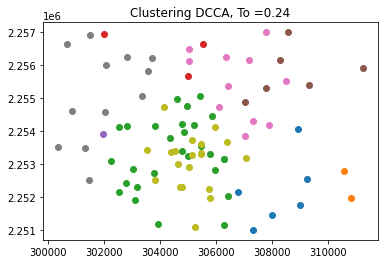

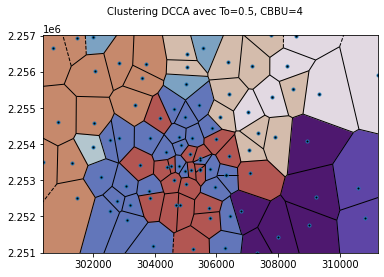

In [137]:
NBBU=2
CBBU=0.1
To=4900

T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
print(util_cost(P,F_norm))
#color=colors(k)
affichage_vor_DCCA(clusters,coord, "Clustering DCCA avec To=0.5, CBBU=4",0,12)
u,c=util_cost(P,F_norm)

9
(1.1635121135083981, 0.868838927291879)


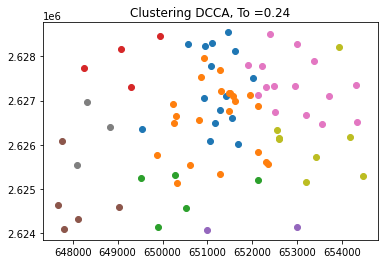

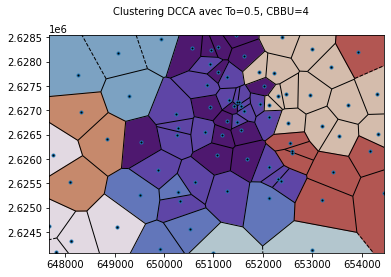

In [135]:
NBBU=2
CBBU=0.1
To=3500

T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
print(util_cost(P,F_norm))
#color=colors(k)
affichage_vor_DCCA(clusters,coord, "Clustering DCCA avec To=0.5, CBBU=4",0,12)
u,c=util_cost(P,F_norm)

## Contre example

2
[1, 0, 1, 1, 1]


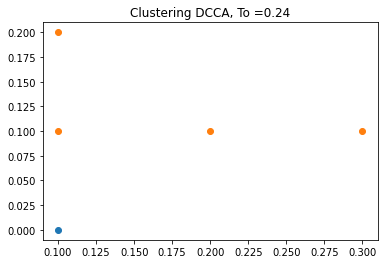

In [7]:
F=[[0.01,0.01,0.05,0.01,0.01,0.01,0.06],
   [0.02,0.01,0.01,0.01,0.08,0.01,0.01],
   [0.01,0.01,0.01,0.01,0.02,0.01,0.01],
   [0.01,0.01,0.01,0.01,0.01,0.01,0.07],
   [0.10,0.01,0.01,0.01,0.01,0.01,0.01]
  ]
r=[]
r.append(DCCA.RRH(0,0,0.1,0.1,F[0]))
r.append(DCCA.RRH(1,1,0.1,0,F[1]))
r.append(DCCA.RRH(1,2,0.2,0.1,F[2]))
r.append(DCCA.RRH(3,3,0.3,0.1,F[3]))
r.append(DCCA.RRH(4,4,0.1,0.2,F[4]))
#r.append(DCCA.RRH(5,5,0.2,0.3,F[5]))
#r.append(DCCA.RRH(6,6,0,0.1,F[6]))
NBBU=2
CBBU=2
To=20

T=DCCA.peak_tracking(CBBU,F,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F,CBBU,10,To,20)
coord,clusters,k=display_cluster(P)
print(k)
print(l)
#color=colors(k)
#affichage_vor(clusters,coord, "Clustering DCCA avec To=0.5, CBBU=4",0,12)

Text(0.5, 0.98, 'Categorical Plotting')

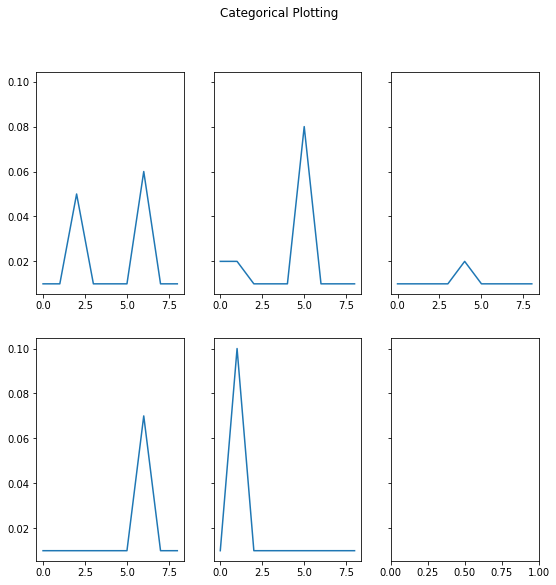

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(9, 9), sharey=True)
axs[0,0].plot([0.01,0.01,0.05,0.01,0.01,0.01,0.06,0.01,0.01])
axs[0,1].plot([0.02,0.02,0.01,0.01,0.01,0.08,0.01,0.01,0.01])
axs[0,2].plot([0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01])
axs[1,0].plot([0.01,0.01,0.01,0.01,0.01,0.01,0.07,0.01,0.01])
axs[1,1].plot([0.01,0.10,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
fig.suptitle('Categorical Plotting')

Text(1, 0.1, '0.1')

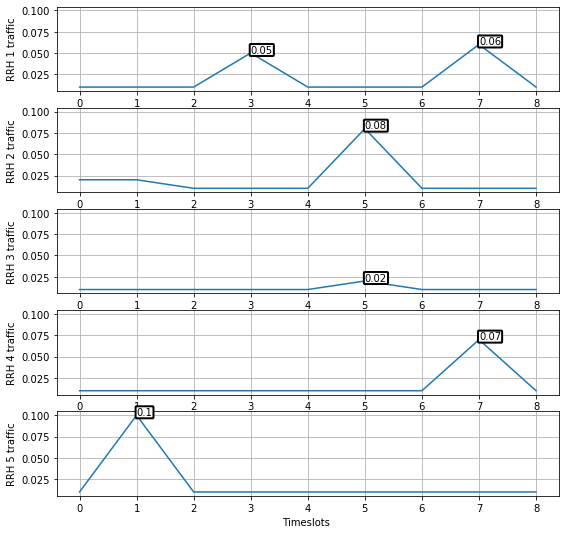

In [66]:
l_x=[i for i in range(len(Fs))]
fig, axs = plt.subplots(5, 1, figsize=(9, 9), sharey=True)
axs[0].plot([0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.06,0.01])
axs[0].set_ylabel("RRH 1 traffic")
axs[1].plot([0.02,0.02,0.01,0.01,0.01,0.08,0.01,0.01,0.01])
axs[1].set_ylabel("RRH 2 traffic")
axs[2].plot([0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01])
axs[2].set_ylabel("RRH 3 traffic")
axs[3].plot([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.07,0.01])
axs[3].set_ylabel("RRH 4 traffic")
axs[4].plot([0.01,0.10,0.01,0.01,0.01,0.01,0.01,0.01,0.01])
axs[4].set_ylabel("RRH 5 traffic")
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()
axs[4].grid()
l0=[0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.06,0.01]
l1=[0.02,0.02,0.01,0.01,0.01,0.08,0.01,0.01,0.01]
l2=[0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01]
l3=[0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.07,0.01]
l4=[0.01,0.10,0.01,0.01,0.01,0.01,0.01,0.01,0.01]

plt.xlabel("Timeslots ")
bbox_props = dict(boxstyle="round,pad=0.1", fc="w", ec="k", lw=2)
axs[0].annotate(round(max(l0),2),xy=(l_x[l0.index(max(l0))],l0[l0.index(max(l0))]),bbox=bbox_props)
axs[0].annotate(round(l0[3],2),xy=(3,l0[3]),bbox=bbox_props)
axs[2].annotate(round(max(l2),2),xy=(l_x[l2.index(max(l2))],l2[l2.index(max(l2))]),bbox=bbox_props)
axs[1].annotate(round(max(l1),2),xy=(l_x[l1.index(max(l1))],l1[l1.index(max(l1))]),bbox=bbox_props)
axs[3].annotate(round(max(l3),2),xy=(l_x[l3.index(max(l3))],l3[l3.index(max(l3))]),bbox=bbox_props)
axs[4].annotate(round(max(l4),2),xy=(l_x[l4.index(max(l4))],l4[l4.index(max(l4))]),bbox=bbox_props)

In [39]:
Fs=list(np.array([0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.06,0.01])+np.array([0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01])+np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.07,0.01])+np.array([0.01,0.10,0.01,0.01,0.01,0.01,0.01,0.01,0.01]))
Fs

[0.04, 0.13, 0.04, 0.08, 0.04, 0.05, 0.04, 0.15000000000000002, 0.04]

Text(5, 0.08, '0.08')

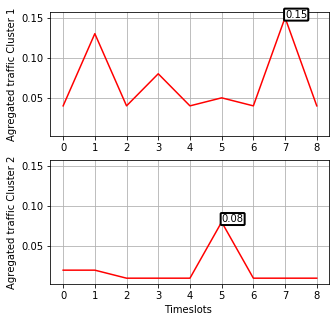

In [60]:
l=[0.02,0.02,0.01,0.01,0.01,0.08,0.01,0.01,0.01]
fig, axs = plt.subplots(2, 1, figsize=(5,5), sharey=True)
axs[0].plot(Fs, color='red')
axs[0].set_ylabel("Agregated traffic Cluster 1") #r1,3,4,5
axs[0].grid()
axs[1].plot([0.02,0.02,0.01,0.01,0.01,0.08,0.01,0.01,0.01],color='red')#r2
axs[1].set_ylabel("Agregated traffic Cluster 2")
axs[1].grid()
plt.xlabel("Timeslots ")
bbox_props = dict(boxstyle="round,pad=0.1", fc="w", ec="k", lw=2)
axs[0].annotate(round(max(Fs),2),xy=(l_x[Fs.index(max(Fs))],Fs[Fs.index(max(Fs))]),bbox=bbox_props)
axs[1].annotate(round(max(l),2),xy=(l_x[l.index(max(l))],l[l.index(max(l))]),bbox=bbox_props)

In [44]:
Fc1=list(np.array([0.01,0.01,0.01,0.05,0.01,0.01,0.01,0.06,0.01])+np.array([0.02,0.02,0.01,0.01,0.01,0.08,0.01,0.01,0.01]))
Fc2=list(np.array([0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01])+np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.07,0.01])+np.array([0.01,0.10,0.01,0.01,0.01,0.01,0.01,0.01,0.01]))

Text(1, 0.12000000000000001, '0.12')

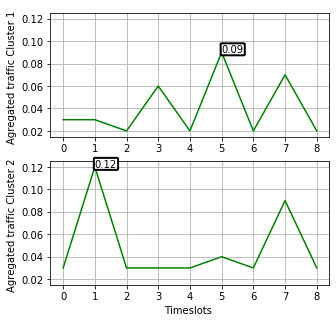

In [61]:
fig, axs = plt.subplots(2, 1, figsize=(5,5), sharey=True)
axs[0].plot(Fc1,color='green')
axs[0].grid()
axs[0].set_ylabel("Agregated traffic Cluster 1 ")# r1,r2
axs[1].plot(Fc2,color='green')
axs[1].grid()
axs[1].set_ylabel("Agregated traffic Cluster 2 ")#: r3,r4,r5
plt.xlabel("Timeslots ")
bbox_props = dict(boxstyle="round,pad=0.1", fc="w", ec="k", lw=2)
axs[0].annotate(round(max(Fc1),2),xy=(l_x[Fc1.index(max(Fc1))],Fc1[Fc1.index(max(Fc1))]),bbox=bbox_props)
axs[1].annotate(round(max(Fc2),2),xy=(l_x[Fc2.index(max(Fc2))],Fc2[Fc2.index(max(Fc2))]),bbox=bbox_props)

In [12]:
DCCA.connectivity([r[0]],W,r[0])

1.6171279878575708

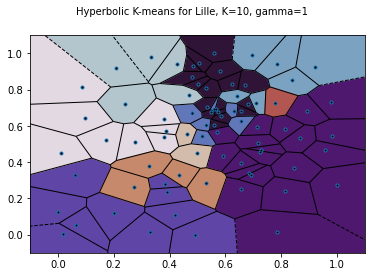

Utilisation :  1.207918057002502  Cost :  0.8535934751539397 Largeur max :  3201.0


In [149]:
gamma=1
les_centres2, l_affectation2 = kmoyennes_robuste_3(10,dataFrames_nor_inv,0.0005,100,gamma)
util,cost=get_util_cost(dataFrames_nor, l_affectation2)
w=get_max_largeur(l_affectation2,dataFrames[0])
affichage_vor(dataFrames_nor_inv[0],l_affectation2,0,12,"Hyperbolic K-means for Lille, K=10, gamma="+str(gamma))
get_nb_cluster(l_affectation2)
util,cost=get_util_cost(dataFrames_nor, l_affectation2)
print('Utilisation : ',util,' Cost : ', cost ,'Largeur max : ',w)

10


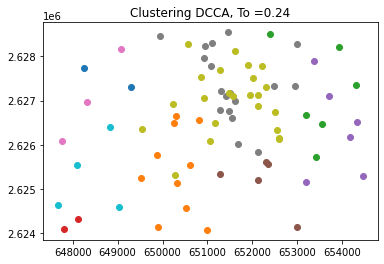

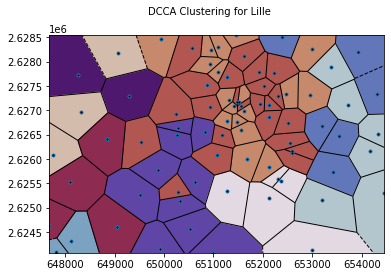

Utilisation :  1.149724310111773  Cost :  0.8890423854808458 Largeur max :  3415.6412282322626


In [148]:
To=3500
T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor_DCCA(clusters,coord, "DCCA Clustering for Lille ",0,12)
u,c=util_cost(P,F_norm)
w=get_max_largeur_DCCA(P)
print('Utilisation : ',u,' Cost : ', c ,'Largeur max : ',w)

In [40]:
les_k=np.arange(16,31,1)
les_k

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [45]:
""" Kmeans """




les_cost_km2=[]
les_cost_km_max2=[]
les_util_km2=[]
les_util_km_max2=[]
les_diam_km2=[]
les_diam_km_max2=[]
les_k=np.arange(16,31,1)
les_k_mean=[]



for k in les_k:

    c_run=[]
    u_run=[]
    d_run=[]  
   

    """    Kmeans Hyperbolique  """
    gamma=1
    c_run_km=[]
    u_run_km=[]
    d_run_km=[]
    for i in range(50):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(k,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        c_run_km.append(cost)
        u_run_km.append(util)
        d_run_km.append(w)

    les_diam_km2.append(sum(d_run_km)/len(d_run_km))
    les_diam_km_max2.append(max(d_run_km))
    les_cost_km2.append(sum(c_run_km)/len(c_run_km))
    les_util_km2.append(sum(u_run_km)/len(u_run_km))
    les_cost_km_max2.append(max(c_run_km))
    les_util_km_max2.append(max(u_run_km))

In [43]:

les_cost_dcca=[]
les_cost_dcca_max=[]
les_util_dcca=[]
les_util_dcca_max=[]
les_diam_dcca=[]
les_diam_dcca_max=[]


les_k_max=[]
les_k_exit=[]
les_k_mean=[]
les_to=[]

CBBU=1
T=DCCA.peak_tracking(CBBU,F_norm,r)
it=0
for To in range (1900,9000,100):

    c_run=[]
    u_run=[]
    d_run=[]
    #k_dcca=[]
    k_dcca=-17
    """    DCCA   """
    k_toconsidr=[]
    k_for_mean=[]
    for i in range(50):
        W=DCCA.matriceComplementarite(r,CBBU,To)
        P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
        tmp=get_k(P)
        k_for_mean.append(tmp)
        if (not(tmp in les_k_exit)):
            k_dcca=tmp
            k_toconsidr.append(tmp)
        #k_dcca.append(get_k(P))
        #les_k.append(k)
        u,c=util_cost(P,F_norm)
        c_run.append(c)
        u_run.append(u)
        d_run.append(get_max_largeur_DCCA(P))
    if it == 0:
        les_k_max.append(max(k_for_mean))
        les_k_mean.append(np.mean(k_for_mean))
    if(k_dcca == -17):
        it+=1
        if (it < 10):
            To=To-100
        else:
            it=0      
    else:
        
        it=0
        les_diam_dcca.append(sum(d_run)/len(d_run))
        les_diam_dcca_max.append(max(d_run))
        les_cost_dcca.append(sum(c_run)/len(c_run))
        les_util_dcca.append(sum(u_run)/len(u_run))
        les_cost_dcca_max.append(max(c_run))
        les_util_dcca_max.append(max(u_run))
        tmp2=max(k_toconsidr)
        k_km=tmp2
        les_k_exit.append(k_km)
        les_to.append(To/1000)
        """ 


        if(True):
            it=0
            les_diam_dcca.append(sum(d_run)/len(d_run))
            les_diam_dcca_max.append(max(d_run))
            les_cost_dcca.append(sum(c_run)/len(c_run))
            les_util_dcca.append(sum(u_run)/len(u_run))
            les_cost_dcca_max.append(max(c_run))
            les_util_dcca_max.append(max(u_run))
            #k_km=int(sum(k_dcca)/len(k_dcca))
            tmp3=max(k_toconsidr)
            tmp2=int(np.mean(k_toconsidr))
            k_km=tmp2
            les_k.append(k_km)
            les_k_mean.append(tmp3)
            les_to.append(To/1000)
        """

        """    Kmeans Hyperbolique  """
        ########### GAMMA = 0.01 #########
        """
        gamma=0.01
        c_run_km=[]
        u_run_km=[]
        d_run_km=[]
        for i in range(10):
            les_centres2, l_affectation2 = kmoyennes_robuste_3(k_km,dataFrames_nor_inv,0.0005,100,gamma)
            util,cost=get_util_cost(dataFrames_nor, l_affectation2)
            w=get_max_largeur(l_affectation2,dataFrames[0])
            c_run_km.append(cost)
            u_run_km.append(util)
            d_run_km.append(w)

        les_diam_km1.append(sum(d_run_km)/len(d_run_km))
        les_diam_km_max1.append(max(d_run_km))
        les_cost_km1.append(sum(c_run_km)/len(c_run_km))
        les_util_km1.append(sum(u_run_km)/len(u_run_km))
        les_cost_km_max1.append(max(c_run_km))
        les_util_km_max1.append(max(u_run_km))
        """
        ########### GAMMA = 1 #########
        gamma=1
        c_run_km=[]
        u_run_km=[]
        d_run_km=[]
        for i in range(50):
            les_centres2, l_affectation2 = kmoyennes_robuste_3(k_km,dataFrames_nor_inv,0.0005,100,gamma)
            util,cost=get_util_cost(dataFrames_nor, l_affectation2)
            w=get_max_largeur(l_affectation2,dataFrames[0])
            c_run_km.append(cost)
            u_run_km.append(util)
            d_run_km.append(w)

        les_diam_km2.append(sum(d_run_km)/len(d_run_km))
        les_diam_km_max2.append(max(d_run_km))
        les_cost_km2.append(sum(c_run_km)/len(c_run_km))
        les_util_km2.append(sum(u_run_km)/len(u_run_km))
        les_cost_km_max2.append(max(c_run_km))
        les_util_km_max2.append(max(u_run_km))

        ########### GAMMA = 50 #########
        """
        gamma=30
        c_run_km=[]
        u_run_km=[]
        d_run_km=[]
        for i in range(10):
            les_centres2, l_affectation2 = kmoyennes_robuste_3(k_km,dataFrames_nor_inv,0.0005,100,gamma)
            util,cost=get_util_cost(dataFrames_nor, l_affectation2)
            w=get_max_largeur(l_affectation2,dataFrames[0])
            c_run_km.append(cost)
            u_run_km.append(util)
            d_run_km.append(w)

        les_diam_km3.append(sum(d_run_km)/len(d_run_km))
        les_diam_km_max3.append(max(d_run_km))
        les_cost_km3.append(sum(c_run_km)/len(c_run_km))
        les_util_km3.append(sum(u_run_km)/len(u_run_km))
        les_cost_km_max3.append(max(c_run_km))
        les_util_km_max3.append(max(u_run_km))
        """

In [43]:
####### Execution 3
"""
les_cost_dcca=les_cost_dcca[0:14]
les_cost_dcca_max=les_cost_dcca_max[0:14]
les_util_dcca=les_util_dcca[0:14]
les_util_dcca_max=les_util_dcca_max[0:14]
les_diam_dcca=les_diam_dcca[0:14]
les_diam_dcca_max=les_diam_dcca_max[0:14]
les_k=les_k[0:14]
les_to=les_to[0:14]
"""
print("EXEXUTION 3")
print(les_cost_dcca)
print(les_cost_dcca_max)
print(les_util_dcca)
print(les_util_dcca_max)
print(les_diam_dcca)
print(les_diam_dcca_max)

#print(les_cost_km1)
print(les_cost_km2)
#print(les_cost_km3)
#print(les_cost_km_max1)
print(les_cost_km_max2)
#print(les_cost_km_max3)
#print(les_util_km1)
print(les_util_km2)
#print(les_util_km3)
#print(les_util_km_max1)
print(les_util_km_max2)
#print(les_util_km_max3)
#print(les_diam_km1)
print(les_diam_km2)
#print(les_diam_km3)
#print(les_diam_km_max1)
print(les_diam_km_max2)
#print(les_diam_km_max3)
print(les_k)
print(les_to)

EXEXUTION 3
[0.9686501396304752, 0.9548227785882346, 0.9443337280575855, 0.9301145954292546, 0.9242527348862513, 0.9169781880422873, 0.9168271591585766, 0.9120906649678486, 0.9127662446446504, 0.899648215801608, 0.9046547169108077, 0.9049751748760737, 0.8993454983250032, 0.8880732507327698, 0.8806612775700792, 0.8808463867255114]
[0.9751566050046712, 0.9660077309077166, 0.9515257560902425, 0.9428130779021505, 0.9331778898051499, 0.9270945663124468, 0.9264814066955924, 0.9366466642522958, 0.9283508110659602, 0.9161147640528928, 0.9196453891334713, 0.923401932787974, 0.9167349893079075, 0.9099867526988925, 0.8885521766918881, 0.8867349767163694]
[1.0710339579041022, 1.0909394550576366, 1.1028751516841102, 1.107018745629639, 1.1167723209555394, 1.1210912136304683, 1.1248834259207752, 1.1195634685034006, 1.1264699871964434, 1.1281630361455655, 1.1118347513363587, 1.103488069205705, 1.1192273322179211, 1.1521418994050017, 1.0318423331259268, 1.03120802825857]
[1.0829128323534831, 1.10189279

In [ ]:
########################################
## Choisir des valeurs pour les tests ##
#######################################
les_diam_dcca
les_cost_dcca
les_util_dcca
les_diam_km2
les_cost_km2
les_util_km2
les_k
les_to

In [69]:
les_util_3d=[]
les_cost_3d=[]
les_diam_3d=[]

les_util_geo=[]
les_cost_geo=[]
les_diam_geo=[]
for ki in les_k:
    c_run_3d=[]
    u_run_3d=[]
    d_run_3d=[]
    
    c_run_geo=[]
    u_run_geo=[]
    d_run_geo=[]
    for i in range(50):
        les_centres_3d, l_affectation_3d = kmoyennes_3d(ki, dataFrames_nor_inv[0], 0.0005, 100)
        util,cost=get_util_cost(dataFrames_nor, l_affectation_3d)
        w=get_max_largeur(l_affectation_3d,dataFrames[0])
        c_run_3d.append(cost)
        u_run_3d.append(util)
        d_run_3d.append(w)
    
    les_util_3d.append((sum(u_run_3d)/len(u_run_3d)))
    les_cost_3d.append((sum(c_run_3d)/len(c_run_3d)))
    les_diam_3d.append((sum(d_run_3d)/len(d_run_3d)))
    for i in range(20):
        les_centres_g, l_affectation_g = kmoyennes_geo(ki, dataFrames_nor_inv[0], 0.0005, 100)
        util,cost=get_util_cost(dataFrames_nor, l_affectation_g)
        w=get_max_largeur(l_affectation_g,dataFrames[0])
        c_run_geo.append(cost)
        u_run_geo.append(util)
        d_run_geo.append(w)
    les_util_geo.append((sum(u_run_geo)/len(u_run_geo)))
    les_cost_geo.append((sum(c_run_geo)/len(c_run_geo)))
    les_diam_geo.append((sum(d_run_geo)/len(d_run_geo)))

In [3]:
les_cost_geo=[0.9251031958531467, 0.9232993079059693, 0.9232227324898051, 0.9188442521371953, 0.9099573284064428, 0.9035877076479792, 0.9036510322769432, 0.8998461467635313, 0.897149958291138, 0.8941204722751974, 0.8914184957963023, 0.8867002131337159, 0.8823405720887638, 0.8824041418845041, 0.8815329108157867, 0.8745084275248306, 0.8739901968536259, 0.8680118604474736, 0.8640027227936227, 0.856960998664043, 0.8509459443555765, 0.8423243142354728, 0.832855266360361, 0.8131502175791285, 0.8073413886554516]
les_cost_3d=[0.9194670495488773, 0.9157670944320438, 0.9123583828823181, 0.9094777564738606, 0.9054475864544707, 0.9018826504241592, 0.9028716597088753, 0.8991522472921065, 0.895242261929145, 0.8942712185473208, 0.8889739214893281, 0.8864621047908079, 0.8817345886785203, 0.8828827704497544, 0.8785919933013892, 0.8680015681841237, 0.866445589061094, 0.8612280759598704, 0.8556438857582688, 0.8496348643639833, 0.8395612893079833, 0.8320344956571251, 0.8201580031609286, 0.8190011688121418, 0.8150697153386182]
les_util_geo=[1.1137049430783033, 1.113896901377448, 1.1145919164997067, 1.115754748303067, 1.1363350485958197, 1.1362416287848198, 1.137752559499869, 1.1444128582036368, 1.1510521622798264, 1.1634950528963979, 1.16020620736773, 1.1645768667368204, 1.1685005018246868, 1.1719196171302793, 1.1718250538866222, 1.1803199134736588, 1.1798404627348182, 1.189339109190612, 1.194466492093767, 1.2022910451627427, 1.2147626246186456, 1.2294770020037458, 1.241712541734177, 1.273519047787134, 1.2847487569088674]
les_util_3d=[1.0863500540834754, 1.080896717985812, 1.0928762778192938, 1.0842204637353976, 1.0973656474163112, 1.1036655164438516, 1.1103879262163865, 1.1046744995564874, 1.11475325385095, 1.1214705108703744, 1.1223890211524667, 1.1336479266294877, 1.1358253486843863, 1.1374322777419343, 1.1404767542440353, 1.1573920699581703, 1.1486282854240981, 1.1698521183316293, 1.1708509238872216, 1.1820621507579494, 1.2100105101301926, 1.233535455232046, 1.2579692744588955, 1.267675105134599, 1.2838123294376613]
les_diam_geo=[1188.55, 1218.4, 1272.0, 1253.0, 1337.4, 1457.15, 1516.55, 1391.35, 1582.5, 1637.15, 1623.55, 1648.25, 1734.85, 1667.8, 1811.25, 1882.15, 1937.25, 2052.2, 2107.3, 2148.25, 2353.85, 2583.55, 2839.3, 3218.25, 3326.0]
les_diam_3d=[1477.4, 1399.55, 1453.65, 1466.5, 1603.85, 1604.25, 1799.5, 1672.3, 1775.25, 1699.7, 1798.8, 1819.15, 1925.45, 1907.15, 2044.95, 2217.8, 2210.8, 2215.4, 2287.35, 2368.9, 2628.3, 2903.2, 3183.75, 3322.0, 3380.0]

In [53]:
les_k_sample=les_k[6:len(les_k)]
les_util_km2_sample=les_util_km2[6:len(les_k)]
les_cost_km2_sample=les_cost_km2[6:len(les_k)]
les_util_dcca_sample=les_util_dcca[6:len(les_k)]
les_cost_dcca_sample=les_cost_dcca[6:len(les_k)]

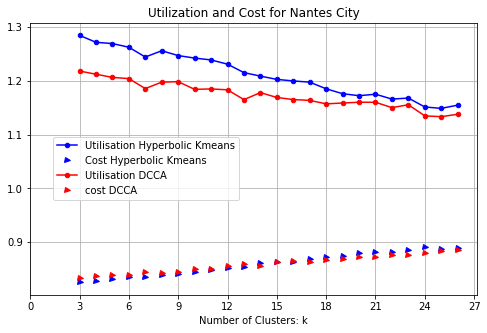

In [81]:
plt.figure(figsize=(8,5))
plt.plot(les_k_sample,les_util_km2_sample,marker='o', markersize=4.5,label="Utilisation Hyperbolic Kmeans",color='blue')
plt.plot(les_k_sample,les_cost_km2_sample,'g>', markersize=5,label="Cost Hyperbolic Kmeans",color='blue')


plt.plot(les_k_sample,les_util_dcca_sample,marker='o', markersize=4.5,label="Utilisation DCCA",color='red')
plt.plot(les_k_sample,les_cost_dcca_sample, 'g>', markersize=5,label="cost DCCA",color='red')

plt.legend(loc=(0.05,0.35))
st=[i*3 for i in range(10)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Utilization and Cost for Nantes City")
plt.grid()
plt.show()

In [64]:
les_k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

## With 50 iterartion

In [89]:

les_k_sample=les_k[2:len(les_k)]
les_util_km2_sample=les_util_km2[2:len(les_k)]
les_cost_km2_sample=les_cost_km2[2:len(les_k)]
les_diam_km2_sample=les_diam_km2[2:len(les_k)]

les_k_exist_sample=les_k_exist[3:len(les_k_exist)]
les_util_dcca_sample=les_util_dcca[3:len(les_k_exist)]
les_cost_dcca_sample=les_cost_dcca[3:len(les_k_exist)]
les_diam_dcca_sample=les_diam_dcca[3:len(les_k_exist)]

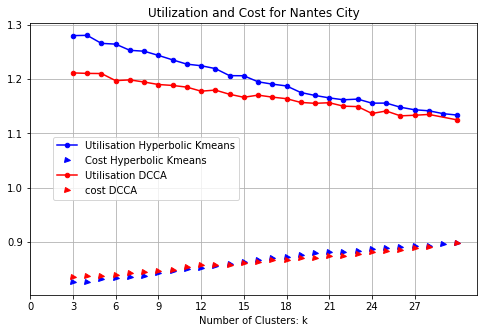

In [74]:
""" second attemps """
plt.figure(figsize=(8,5))
plt.plot(les_k_sample,les_util_km2_sample,marker='o', markersize=4.5,label="Utilisation Hyperbolic Kmeans",color='blue')
plt.plot(les_k_sample,les_cost_km2_sample,'g>', markersize=5,label="Cost Hyperbolic Kmeans",color='blue')


plt.plot(les_k_exist_sample,les_util_dcca_sample,marker='o', markersize=4.5,label="Utilisation DCCA",color='red')
plt.plot(les_k_exist_sample,les_cost_dcca_sample, 'g>', markersize=5,label="cost DCCA",color='red')

plt.legend(loc=(0.05,0.35))
st=[i*3 for i in range(10)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Utilization and Cost for Nantes City")
plt.grid()
plt.show()

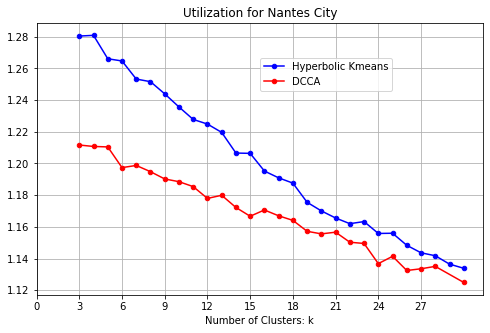

In [104]:
""" second attemps """
plt.figure(figsize=(8,5))
plt.plot(les_k_sample,les_util_km2_sample,marker='o', markersize=4.5,label="Hyperbolic Kmeans",color='blue')



plt.plot(les_k_exist_sample,les_util_dcca_sample,marker='o', markersize=4.5,label="DCCA",color='red')


plt.legend(loc=(0.5,0.75))
st=[i*3 for i in range(10)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Utilization for Nantes City")
plt.grid()
plt.show()

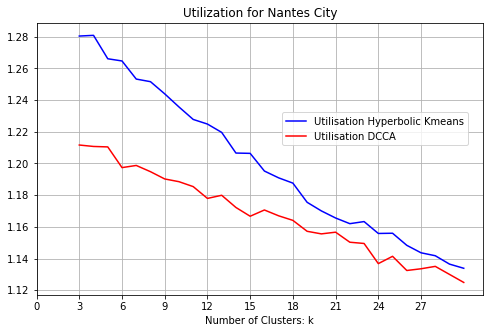

In [77]:
""" second attemps """
plt.figure(figsize=(8,5))
plt.plot(les_k_sample,les_util_km2_sample, markersize=4.5,label="Utilisation Hyperbolic Kmeans",color='blue')



plt.plot(les_k_exist_sample,les_util_dcca_sample, markersize=4.5,label="Utilisation DCCA",color='red')


plt.legend(loc=(0.55,0.55))
st=[i*3 for i in range(10)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Utilization for Nantes City")
plt.grid()
plt.show()

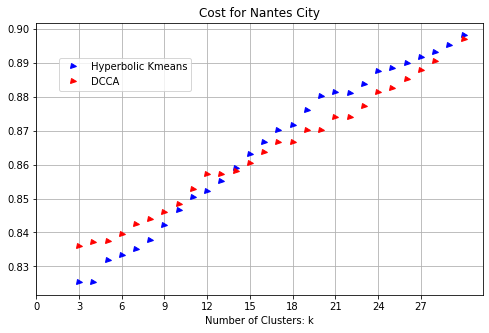

In [105]:
""" second attemps """
plt.figure(figsize=(8,5))

plt.plot(les_k_sample,les_cost_km2_sample,'g>', markersize=5,label="Hyperbolic Kmeans",color='blue')



plt.plot(les_k_exist_sample,les_cost_dcca_sample, 'g>', markersize=5,label="DCCA",color='red')

plt.legend(loc=(0.05,0.75))
st=[i*3 for i in range(10)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Cost for Nantes City")
plt.grid()
plt.show()

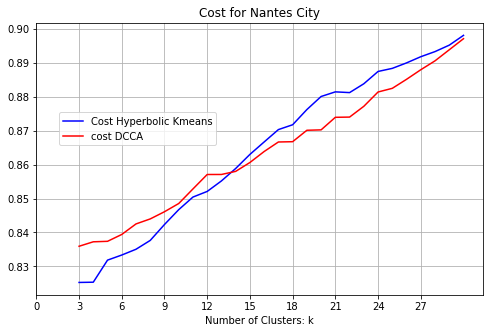

In [79]:
""" second attemps """
plt.figure(figsize=(8,5))

plt.plot(les_k_sample,les_cost_km2_sample, markersize=5,label="Cost Hyperbolic Kmeans",color='blue')



plt.plot(les_k_exist_sample,les_cost_dcca_sample, markersize=5,label="cost DCCA",color='red')

plt.legend(loc=(0.05,0.55))
st=[i*3 for i in range(10)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Cost for Nantes City")
plt.grid()
plt.show()

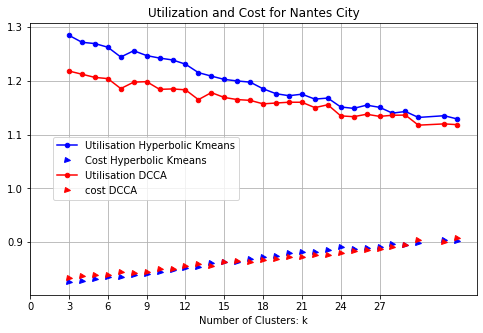

In [74]:
plt.figure(figsize=(8,5))
plt.plot(les_k,les_util_km2,marker='o', markersize=4.5,label="Utilisation Hyperbolic Kmeans",color='blue')
plt.plot(les_k,les_cost_km2,'g>', markersize=5,label="Cost Hyperbolic Kmeans",color='blue')


plt.plot(les_k,les_util_dcca,marker='o', markersize=4.5,label="Utilisation DCCA",color='red')
plt.plot(les_k,les_cost_dcca, 'g>', markersize=5,label="cost DCCA",color='red')

plt.legend(loc=(0.05,0.35))
st=[i*3 for i in range(10)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Utilization and Cost for Nantes City")
plt.grid()
plt.show()

In [82]:
les_util_geo_sample=les_util_geo[2:len(les_k)]
les_cost_geo_sample=les_cost_geo[2:len(les_k)]
les_util_3d_sample=les_util_3d[2:len(les_k)]
les_cost_3d_sample=les_cost_3d[2:len(les_k)]

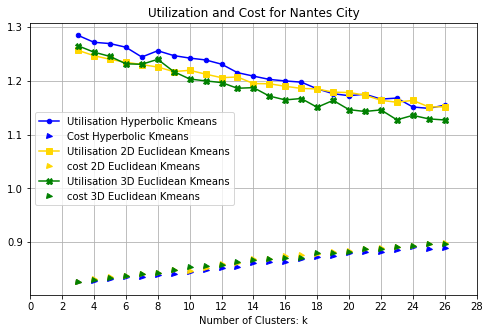

In [86]:
plt.figure(figsize=(8,5))
plt.plot(les_k_sample,les_util_km2_sample,marker='o', markersize=4.5,label="Utilisation Hyperbolic Kmeans",color='blue')
plt.plot(les_k_sample,les_cost_km2_sample,'g>', markersize=5,label="Cost Hyperbolic Kmeans",color='blue')

plt.plot(les_k_sample,les_util_geo_sample, marker='s',label="Utilisation 2D Euclidean Kmeans",color='gold')
plt.plot(les_k_sample,les_cost_geo_sample, 'g>', markersize=5,label="cost 2D Euclidean Kmeans",color='gold')


plt.plot(les_k_sample,les_util_3d_sample, marker='X',label="Utilisation 3D Euclidean Kmeans",color='green')
plt.plot(les_k_sample,les_cost_3d_sample, 'g>', markersize=5,label="cost 3D Euclidean Kmeans",color='green')
plt.legend()
st=[i*2 for i in range(15)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Utilization and Cost for Nantes City")
plt.grid()
plt.show()

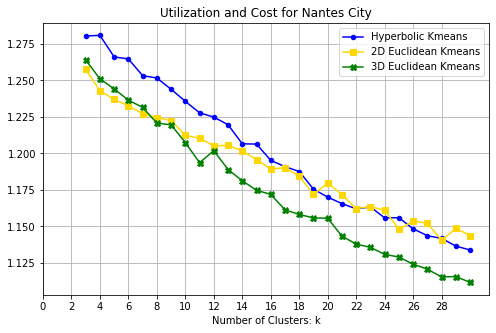

In [106]:
"""    SEcond attempt """

plt.figure(figsize=(8,5))
plt.plot(les_k_sample,les_util_km2_sample,marker='o', markersize=4.5,label="Hyperbolic Kmeans",color='blue')


plt.plot(les_k_sample,les_util_geo_sample, marker='s',label="2D Euclidean Kmeans",color='gold')


plt.plot(les_k_sample,les_util_3d_sample, marker='X',label="3D Euclidean Kmeans",color='green')
plt.legend()
st=[i*2 for i in range(15)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Utilization and Cost for Nantes City")
plt.grid()
plt.show()

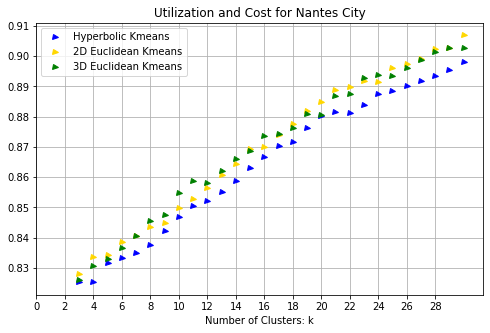

In [107]:
"""    SEcond attempt """

plt.figure(figsize=(8,5))

plt.plot(les_k_sample,les_cost_km2_sample,'g>', markersize=5,label="Hyperbolic Kmeans",color='blue')


plt.plot(les_k_sample,les_cost_geo_sample, 'g>', markersize=5,label="2D Euclidean Kmeans",color='gold')



plt.plot(les_k_sample,les_cost_3d_sample, 'g>', markersize=5,label="3D Euclidean Kmeans",color='green')
plt.legend()
st=[i*2 for i in range(15)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Utilization and Cost for Nantes City")
plt.grid()
plt.show()

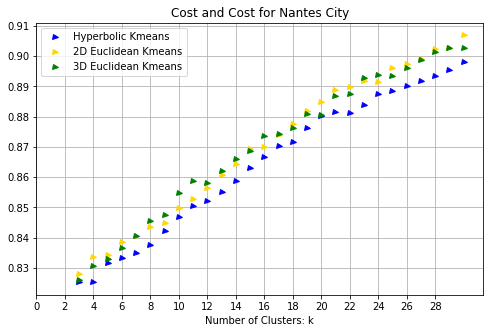

In [108]:
"""    SEcond attempt """

plt.figure(figsize=(8,5))

plt.plot(les_k_sample,les_cost_km2_sample,'g>', markersize=5,label="Hyperbolic Kmeans",color='blue')


plt.plot(les_k_sample,les_cost_geo_sample, 'g>', markersize=5,label="2D Euclidean Kmeans",color='gold')



plt.plot(les_k_sample,les_cost_3d_sample, 'g>', markersize=5,label="3D Euclidean Kmeans",color='green')
plt.legend()
st=[i*2 for i in range(15)]
plt.xticks(st,st)
plt.xlabel("Number of Clusters: k")
plt.title("Cost and Cost for Nantes City")
plt.grid()
plt.show()

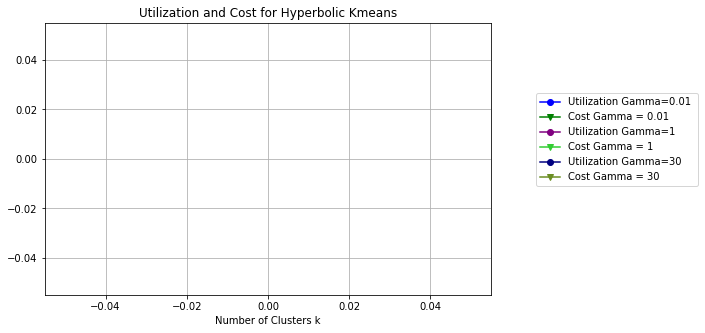

In [51]:
plt.figure(figsize=(8,5))
plt.plot(les_k,les_util_km1, marker='o',label="Utilization Gamma=0.01 ",color='blue')
plt.plot(les_k,les_cost_km1, marker='v',label="Cost Gamma = 0.01",color='green')

plt.plot(les_k,les_util_km2, marker='o',label="Utilization Gamma=1 ",color='purple')
plt.plot(les_k,les_cost_km2, marker='v',label="Cost Gamma = 1",color='limegreen')

plt.plot(les_k,les_util_km3, marker='o',label="Utilization Gamma=30 ",color='navy')
plt.plot(les_k,les_cost_km3, marker='v',label="Cost Gamma = 30",color='olivedrab')


plt.legend(loc=(1.1,0.4))

plt.xlabel("Number of Clusters k")
plt.title("Utilization and Cost for Hyperbolic Kmeans")
plt.grid()
plt.show()

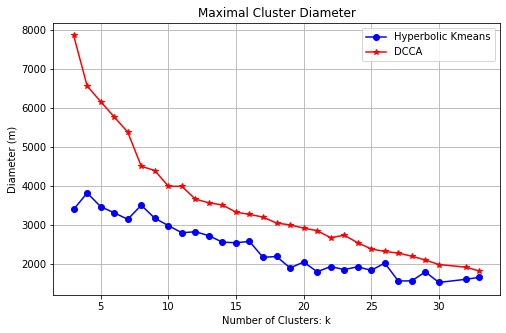

In [84]:
plt.figure(figsize=(8,5))
plt.plot(les_k_sample,les_diam_km2_sample, marker='o',label="Hyperbolic Kmeans",color='blue')

#plt.plot(les_k,les_diam_geo, marker='s',label="2D Euclidean Kmeans",color='red')


#plt.plot(les_k,les_diam_3d, marker='X',label="3D Euclidean Kmeans",color='green')

plt.plot(les_k_exist_sample,les_diam_dcca_sample, marker='*',label="DCCA",color='red')

plt.legend()

plt.xlabel("Number of Clusters: k")
plt.ylabel("Diameter (m)")
plt.title("Maximal Cluster Diameter")
plt.grid()
plt.show()

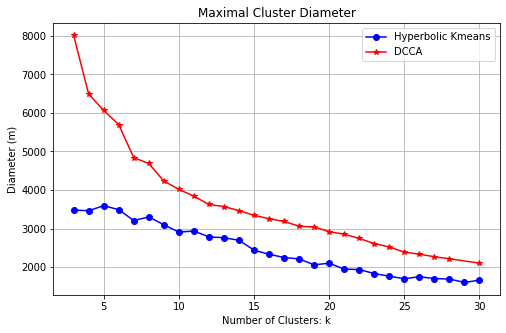

In [90]:
"""   Second attempt"""
plt.figure(figsize=(8,5))
plt.plot(les_k_sample,les_diam_km2_sample, marker='o',label="Hyperbolic Kmeans",color='blue')

#plt.plot(les_k,les_diam_geo, marker='s',label="2D Euclidean Kmeans",color='red')


#plt.plot(les_k,les_diam_3d, marker='X',label="3D Euclidean Kmeans",color='green')

plt.plot(les_k_exist_sample,les_diam_dcca_sample, marker='*',label="DCCA",color='red')

plt.legend()

plt.xlabel("Number of Clusters: k")
plt.ylabel("Diameter (m)")
plt.title("Maximal Cluster Diameter")
plt.grid()
plt.show()

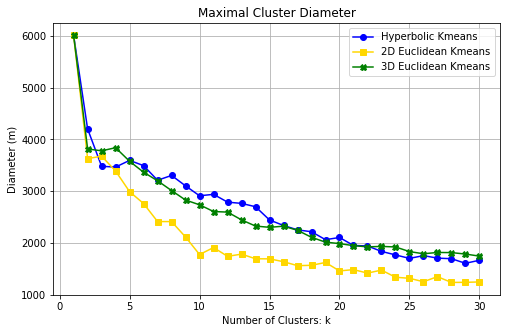

In [91]:
plt.figure(figsize=(8,5))
plt.plot(les_k,les_diam_km2, marker='o',label="Hyperbolic Kmeans",color='blue')

plt.plot(les_k,les_diam_geo, marker='s',label="2D Euclidean Kmeans",color='gold')


plt.plot(les_k,les_diam_3d, marker='X',label="3D Euclidean Kmeans",color='green')

#plt.plot(les_k,les_diam_dcca, marker='*',label="DCCA",color='red')

plt.legend()

plt.xlabel("Number of Clusters: k")
plt.ylabel("Diameter (m)")
plt.title("Maximal Cluster Diameter")
plt.grid()
plt.show()

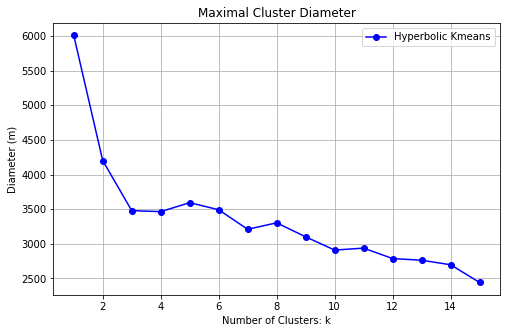

In [51]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,16,1),les_diam_km2, marker='o',label="Hyperbolic Kmeans",color='blue')

#plt.plot(les_k,les_diam_geo, marker='s',label="2D Euclidean Kmeans",color='gold')


#plt.plot(les_k,les_diam_3d, marker='X',label="3D Euclidean Kmeans",color='green')

#plt.plot(les_k,les_diam_dcca, marker='*',label="DCCA",color='red')

plt.legend()

plt.xlabel("Number of Clusters: k")
plt.ylabel("Diameter (m)")
plt.title("Maximal Cluster Diameter")
plt.grid()
plt.show()

## Relative improvement

In [124]:
k_6=les_k_exist.index(7)
k_2=les_k_exist.index(3)

#util_dcca_max6=les_util_dcca_max[k_6]
#util_km_max6=les_util_km_max2[5]
util_dcca_moy6=les_util_dcca[k_6]
util_km_moy6=les_util_km2[5]
util_geo_moy6=les_util_geo[5]
util_3d_moy6=les_util_3d[5]
 
#util_dcca_max2=les_util_dcca_max[k_2]
#util_km_max2=les_util_km_max2[k_2]
util_dcca_moy2=les_util_dcca[k_2]
util_km_moy2=les_util_km2[k_2]
util_geo_moy2=les_util_geo[k_2]
util_3d_moy2=les_util_3d[k_2]


#cost_dcca_max6=les_cost_dcca_max[k_6]
#cost_km_max6=les_cost_km_max2[5]
cost_dcca_moy6=les_cost_dcca[k_6]
cost_km_moy6=les_cost_km2[5]
cost_geo_moy6=les_cost_geo[5]
cost_3d_moy6=les_cost_3d[5]

#cost_dcca_max2=les_cost_dcca_max[k_2]
#cost_km_max2=les_cost_km_max2[k_2]
cost_dcca_moy2=les_cost_dcca[k_2]
cost_km_moy2=les_cost_km2[k_2]
cost_geo_moy2=les_cost_geo[k_2]
cost_3d_moy2=les_cost_3d[k_2]


In [125]:
les_k

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [126]:
print("----------- K=6")

print("----Hyper/ DCCA : ")
""" 
print("Util:",100*abs(util_km_max6-util_dcca_max6)/util_dcca_max6)
print("Cost:",100*abs(cost_km_max6-cost_dcca_max6)/cost_dcca_max6)
print()
"""
print("Util Moy:",100*abs(util_km_moy6-util_dcca_moy6)/util_dcca_moy6)
print("Cost Moy:",100*abs(cost_km_moy6-cost_dcca_moy6)/cost_dcca_moy6)
print()
print("----Hyper/ 3D: ")
print("Util:",100*abs(util_km_moy6-util_3d_moy6)/util_3d_moy6)
print("Cost:",100*abs(cost_km_moy6-cost_3d_moy6)/cost_3d_moy6)
print()
print("----Hyper/ 2D: ")
print("Util:",100*abs(util_km_moy6-util_geo_moy6)/util_geo_moy6)
print("Cost:",100*abs(cost_km_moy6-cost_geo_moy6)/cost_geo_moy6)
print()
print()

print("----------- K=2")
print()
print("----Hyper/ DCCA : ")
""" 
print("Util:",100*abs(util_km_max2-util_dcca_max2)/util_dcca_max2)
print("Cost:",100*abs(cost_km_max2-cost_dcca_max2)/cost_dcca_max2)
print()
"""
print("Util Moy:",100*abs(util_km_moy2-util_dcca_moy2)/util_dcca_moy2)
print("Cost Moy:",100*abs(cost_km_moy2-cost_dcca_moy2)/cost_dcca_moy2)
print()
print("----Hyper/ 3D: ")
print("Util:",100*abs(util_km_moy2-util_3d_moy2)/util_3d_moy2)
print("Cost:",100*abs(cost_km_moy2-cost_3d_moy2)/cost_3d_moy2)
print()
print("----Hyper/ 2D: ")
print("Util:",100*abs(util_km_moy2-util_geo_moy2)/util_geo_moy2)
print("Cost:",100*abs(cost_km_moy2-cost_geo_moy2)/cost_geo_moy2)


----------- K=6
----Hyper/ DCCA : 
Util Moy: 5.501689403605434
Cost Moy: 1.0889893679101508

----Hyper/ 3D: 
Util: 2.2812710954537256
Cost: 0.3919079736085061

----Hyper/ 2D: 
Util: 2.5965093920584366
Cost: 0.6087657835673078


----------- K=2

----Hyper/ DCCA : 
Util Moy: 6.421060253013263
Cost Moy: 7.441870998415221

----Hyper/ 3D: 
Util: 2.000764588516006
Cost: 0.4939683052437722

----Hyper/ 2D: 
Util: 0.8669730487333959
Cost: 0.9583482225186376


## DRAFTS

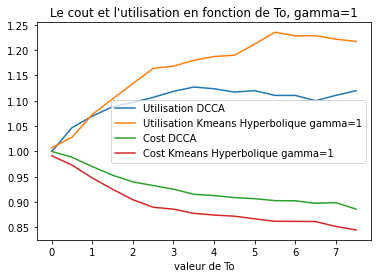

In [59]:
plt.plot(les_to,les_util_dcca,label='Utilisation DCCA')
plt.plot(les_to,les_util_km2,label='Utilisation Kmeans Hyperbolique gamma=1')
plt.plot(les_to,les_cost_dcca,label='Cost DCCA')
plt.plot(les_to,les_cost_km2,label='Cost Kmeans Hyperbolique gamma=1')

plt.legend()
plt.xlabel("valeur de To")
plt.title("Le cout et l'utilisation en fonction de To, gamma=1")
plt.show()

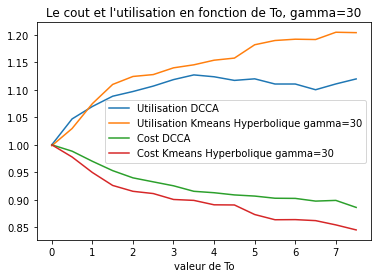

In [60]:
plt.plot(les_to,les_util_dcca,label='Utilisation DCCA')
plt.plot(les_to,les_util_km3,label='Utilisation Kmeans Hyperbolique gamma=30')
plt.plot(les_to,les_cost_dcca,label='Cost DCCA')
plt.plot(les_to,les_cost_km3,label='Cost Kmeans Hyperbolique gamma=30')

plt.legend()
plt.xlabel("valeur de To")
plt.title("Le cout et l'utilisation en fonction de To, gamma=30")
plt.show()

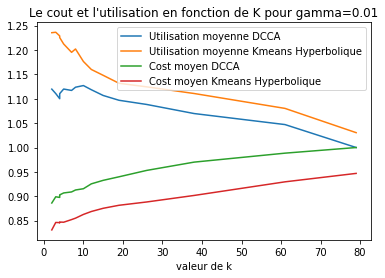

In [61]:
plt.plot(les_k,les_util_dcca,label='Utilisation moyenne DCCA')
plt.plot(les_k,les_util_km1,label='Utilisation moyenne Kmeans Hyperbolique')
plt.plot(les_k,les_cost_dcca,label='Cost moyen DCCA')
plt.plot(les_k,les_cost_km1,label='Cost moyen Kmeans Hyperbolique')

plt.legend()
plt.xlabel("valeur de k")
plt.title("Le cout et l'utilisation en fonction de K pour gamma=0.01")
plt.show()

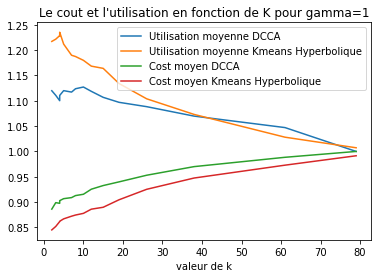

In [62]:
plt.plot(les_k,les_util_dcca,label='Utilisation moyenne DCCA')
plt.plot(les_k,les_util_km2,label='Utilisation moyenne Kmeans Hyperbolique')
plt.plot(les_k,les_cost_dcca,label='Cost moyen DCCA')
plt.plot(les_k,les_cost_km2,label='Cost moyen Kmeans Hyperbolique')

plt.legend()
plt.xlabel("valeur de k")
plt.title("Le cout et l'utilisation en fonction de K pour gamma=1")
plt.show()

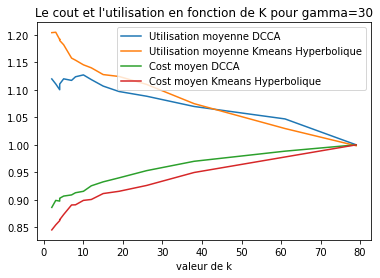

In [53]:
plt.plot(les_k,les_util_dcca,label='Utilisation moyenne DCCA')
plt.plot(les_k,les_util_km3,label='Utilisation moyenne Kmeans Hyperbolique')
plt.plot(les_k,les_cost_dcca,label='Cost moyen DCCA')
plt.plot(les_k,les_cost_km3,label='Cost moyen Kmeans Hyperbolique')

plt.legend()
plt.xlabel("valeur de k")
plt.title("Le cout et l'utilisation en fonction de K pour gamma=30")
plt.show()

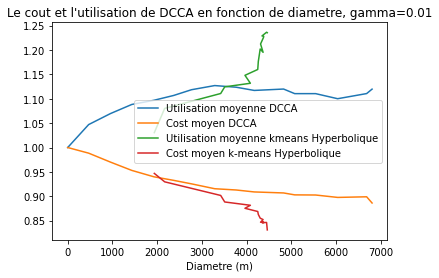

In [63]:
plt.plot(les_diam_dcca,les_util_dcca,label='Utilisation moyenne DCCA')
plt.plot(les_diam_dcca,les_cost_dcca,label='Cost moyen DCCA')
plt.plot(les_diam_km1,les_util_km1,label='Utilisation moyenne kmeans Hyperbolique')
plt.plot(les_diam_km1,les_cost_km1,label='Cost moyen k-means Hyperbolique')
plt.legend()
plt.xlabel("Diametre (m)")
plt.title("Le cout et l'utilisation de DCCA en fonction de diametre, gamma=0.01")
plt.show()

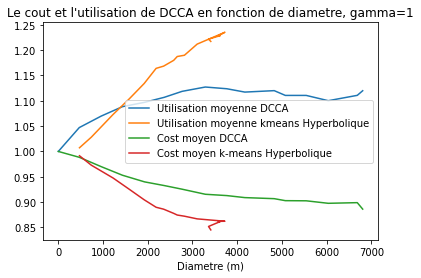

In [64]:
plt.plot(les_diam_dcca,les_util_dcca,label='Utilisation moyenne DCCA')
plt.plot(les_diam_km2,les_util_km2,label='Utilisation moyenne kmeans Hyperbolique')
plt.plot(les_diam_dcca,les_cost_dcca,label='Cost moyen DCCA')
plt.plot(les_diam_km2,les_cost_km2,label='Cost moyen k-means Hyperbolique')
plt.legend()
plt.xlabel("Diametre (m)")
plt.title("Le cout et l'utilisation de DCCA en fonction de diametre, gamma=1")
plt.show()

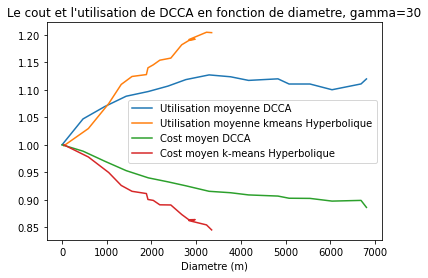

In [65]:
plt.plot(les_diam_dcca,les_util_dcca,label='Utilisation moyenne DCCA')
plt.plot(les_diam_km3,les_util_km3,label='Utilisation moyenne kmeans Hyperbolique')
plt.plot(les_diam_dcca,les_cost_dcca,label='Cost moyen DCCA')
plt.plot(les_diam_km3,les_cost_km3,label='Cost moyen k-means Hyperbolique')
plt.legend()
plt.xlabel("Diametre (m)")
plt.title("Le cout et l'utilisation de DCCA en fonction de diametre, gamma=30")
plt.show()

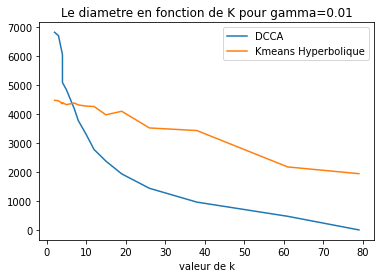

In [66]:
plt.plot(les_k,les_diam_dcca,label='DCCA')
plt.plot(les_k,les_diam_km1,label='Kmeans Hyperbolique')
#plt.plot(to,les_util_max,label='Utilisation max')
#plt.plot(to,les_cost_max,label='Cost max')
plt.legend()
plt.xlabel("valeur de k")
plt.title("Le diametre en fonction de K pour gamma=0.01")
plt.show()

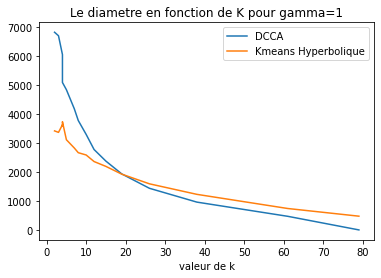

In [67]:
plt.plot(les_k,les_diam_dcca,label='DCCA')
plt.plot(les_k,les_diam_km2,label='Kmeans Hyperbolique')
#plt.plot(to,les_util_max,label='Utilisation max')
#plt.plot(to,les_cost_max,label='Cost max')
plt.legend()
plt.xlabel("valeur de k")
plt.title("Le diametre en fonction de K pour gamma=1")
plt.show()

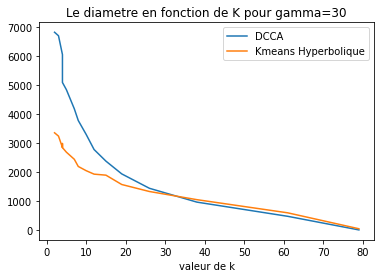

In [68]:
plt.plot(les_k,les_diam_dcca,label='DCCA')
plt.plot(les_k,les_diam_km3,label='Kmeans Hyperbolique')
#plt.plot(to,les_util_max,label='Utilisation max')
#plt.plot(to,les_cost_max,label='Cost max')
plt.legend()
plt.xlabel("valeur de k")
plt.title("Le diametre en fonction de K pour gamma=30")
plt.show()

In [76]:
print(les_diam,les_diam_km)

[435.25854385640724, 970.7837040247431, 1435.705401536123, 1989.4433894936544, 2334.3371650213685, 2705.2264230559335, 3398.4974621146916, 3572.416129176443, 4401.775210071501, 4982.055198409588, 5056.802349311272, 5509.748179363554, 5702.869891554602] [651.3, 1268.4, 1636.9, 1862.8, 1926.7, 2144.9, 2344.5, 2759.2, 2993.0, 3018.0, 3593.4, 3174.1, 3155.4]


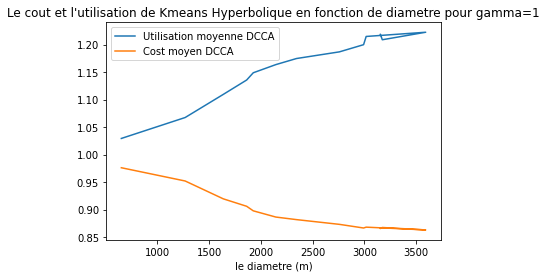

In [83]:
plt.plot(les_diam_km,les_util_km,label='Utilisation moyenne DCCA')
plt.plot(les_diam_km,les_cost_km,label='Cost moyen DCCA')
plt.legend()
plt.xlabel("le diametre (m)")
plt.title("Le cout et l'utilisation de Kmeans Hyperbolique en fonction de diametre pour gamma=1")
plt.show()

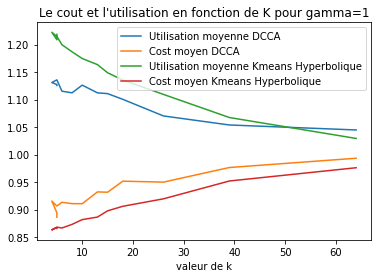

In [81]:
plt.plot(les_k,les_util,label='Utilisation moyenne DCCA')
plt.plot(les_k,les_cost,label='Cost moyen DCCA')
plt.plot(les_k,les_util_km,label='Utilisation moyenne Kmeans Hyperbolique')
plt.plot(les_k,les_cost_km,label='Cost moyen Kmeans Hyperbolique')
#plt.plot(to,les_util_max,label='Utilisation max')
#plt.plot(to,les_cost_max,label='Cost max')
plt.legend()
plt.xlabel("valeur de k")
plt.title("Le cout et l'utilisation en fonction de K pour gamma=1")
plt.show()

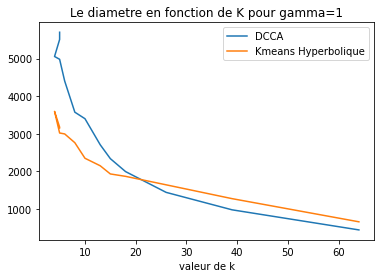

In [84]:
plt.plot(les_k,les_diam,label='DCCA')
plt.plot(les_k,les_diam_km,label='Kmeans Hyperbolique')
#plt.plot(to,les_util_max,label='Utilisation max')
#plt.plot(to,les_cost_max,label='Cost max')
plt.legend()
plt.xlabel("valeur de k")
plt.title("Le diametre en fonction de K pour gamma=1")
plt.show()

In [ ]:
gamma=0.1
les_cost2=[]
les_cost_max2=[]
les_util2=[]
les_util_max2=[]
les_diam2=[]
les_diam_max2=[]

les_cost_km2=[]
les_cost_max_km2=[]
les_util_km2=[]
les_util_max_km2=[]
les_diam_km2=[]
les_diam_max_km2=[]
les_k2=[]
CBBU=1
for To in range (100,6600,250):
    c_run=[]
    u_run=[]
    d_run=[]
    
    c_run_km=[]
    u_run_km=[]
    d_run_km=[]
    k_dcca=[]
    for i in range(15):
        W=DCCA.matriceComplementarite(r,CBBU,To)
        P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
        #k=get_k(P)
        k_dcca.append(get_k(P))
        u,c=util_cost(P,F_norm)
        c_run.append(c)
        u_run.append(u)
        d_run.append(get_max_largeur_DCCA(P))
    k_km=int(sum(k_dcca)/len(k_dcca))
    les_k2.append(k_km)
    for i in range(15):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(k_km,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        c_run_km.append(cost)
        u_run_km.append(util)
        d_run_km.append(w)
    les_diam2.append(sum(d_run)/len(d_run))
    les_diam_max2.append(max(d_run))
    les_cost2.append(sum(c_run)/len(c_run))
    les_util2.append(sum(u_run)/len(u_run))
    les_cost_max2.append(max(c_run))
    les_util_max2.append(max(u_run))
                     
    les_diam_km2.append(sum(d_run_km)/len(d_run_km))
    les_diam_max_km2.append(max(d_run_km))
    les_cost_km2.append(sum(c_run_km)/len(c_run_km))
    les_util_km2.append(sum(u_run_km)/len(u_run_km))
    les_cost_max_km2.append(max(c_run_km))
    les_util_max_km2.append(max(u_run_km))

In [ ]:
to=np.arange(0.1,6.6,0.25)
plt.plot(to,les_util2,label='Utilisation moyenne DCCA')
plt.plot(to,les_cost2,label='Cost moyen DCCA')
plt.plot(to,les_util_km2,label='Utilisation moyenne Kmeans Hyperbolique')
plt.plot(to,les_cost_km2,label='Cost moyen Kmeans Hyperbolique')
#plt.plot(to,les_util_max,label='Utilisation max')
#plt.plot(to,les_cost_max,label='Cost max')
plt.legend()
plt.xlabel("valeur de To")
plt.title("Le cout et l'utilisation en fonction de To gamma=0.1")
plt.show()

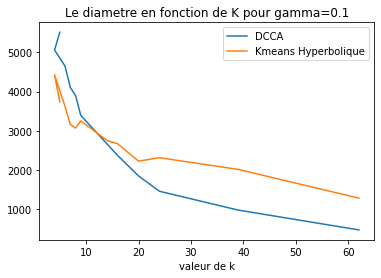

In [89]:
plt.plot(les_k2[0:12],les_diam2,label='DCCA')
plt.plot(les_k2[0:12],les_diam_km2,label='Kmeans Hyperbolique')
#plt.plot(to,les_util_max,label='Utilisation max')
#plt.plot(to,les_cost_max,label='Cost max')
plt.legend()
plt.xlabel("valeur de k")
plt.title("Le diametre en fonction de K pour gamma=0.1")
plt.show()

On a que les moins le nombre de clusters le mieux est l'utilsation et le cout, mais on est restraint avec la contrainte de diamètre. Ce plot montre que avec Kmeans Hyperbolique la contrainte de distance est respectée pour un nombre de clusters moins que DCCA.  Par exemple, si on ne veut pas dépasser 3.5km avec DCCA on a 10 clusters, or que avec hyperbolique on a 7-8 clusters. 

In [88]:
les_k2[0:12]

[62, 39, 24, 20, 16, 14, 9, 8, 7, 6, 4, 5]

In [ ]:
gamma=20
les_cost3=[]
les_cost_max3=[]
les_util3=[]
les_util_max3=[]
les_diam3=[]
les_diam_max3=[]

les_cost_km3=[]
les_cost_max_km3=[]
les_util_km3=[]
les_util_max_km3=[]
les_diam_km3=[]
les_diam_max_km3=[]
les_k3=[]
CBBU=1
for To in range (100,6600,250):
    c_run=[]
    u_run=[]
    d_run=[]
    
    c_run_km=[]
    u_run_km=[]
    d_run_km=[]
    k_dcca=[]
    for i in range(1):
        W=DCCA.matriceComplementarite(r,CBBU,To)
        P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
        #k=get_k(P)
        k_dcca.append(get_k(P))
        #les_k2.append(k)
        u,c=util_cost(P,F_norm)
        c_run.append(c)
        u_run.append(u)
        d_run.append(get_max_largeur_DCCA(P))
    k_km=int(sum(k__dcca)/len(k_dcca))
    les_k3.append(k_km)
    for i in range(10):
        les_centres2, l_affectation2 = kmoyennes_robuste_3(k_km,dataFrames_nor_inv,0.0005,100,gamma)
        util,cost=get_util_cost(dataFrames_nor, l_affectation2)
        w=get_max_largeur(l_affectation2,dataFrames[0])
        c_run_km.append(cost)
        u_run_km.append(util)
        d_run_km.append(w)
    les_diam3.append(sum(d_run)/len(d_run))
    les_diam_max3.append(max(d_run))
    les_cost3.append(sum(c_run)/len(c_run))
    les_util3.append(sum(u_run)/len(u_run))
    les_cost_max3.append(max(c_run))
    les_util_max3.append(max(u_run))
                     
    les_diam_km3.append(sum(d_run_km)/len(d_run_km))
    les_diam_max_km3.append(max(d_run_km))
    les_cost_km3.append(sum(c_run_km)/len(c_run_km))
    les_util_km3.append(sum(u_run_km)/len(u_run_km))
    les_cost_max_km3.append(max(c_run_km))
    les_util_max_km3.append(max(u_run_km))

In [ ]:
to=np.arange(0.5,6.5,0.5)
plt.plot(to,les_util3,label='Utilisation moyenne DCCA')
plt.plot(to,les_cost3,label='Cost moyen DCCA')
plt.plot(to,les_util_km3,label='Utilisation moyenne Kmeans Hyperbolique')
plt.plot(to,les_cost_km3,label='Cost moyen Kmeans Hyperbolique')
#plt.plot(to,les_util_max,label='Utilisation max')
#plt.plot(to,les_cost_max,label='Cost max')
plt.legend()
plt.xlabel("valeur de To")
plt.title("Le cout et l'utilisation en fonction de To gamma=0.1")
plt.show()